# **1. Descripción del proyecto**





## **1.1 Problematica**

La empresa TELECOM X enfrenta serias dificultades para mantener la confianza de sus clientes, lo que ha generado cancelaciones masivas en los distintos servicios que ofrece. Ante esta problemática, surge la necesidad de implementar estrategias efectivas que permitan recuperar la fidelidad de los usuarios y garantizar la sostenibilidad del negocio



##1.2. Objetivo
Analizar la evasion de clientes de la empresa TELECOM X mediante el analisis de datos.

*   Proceos de ETL (Extracción, Transformación y Carga)
*   Realizar un Análisis Exploratorio de Datos (EDA)

# **2. ETL**

# 2.1 📌 Extracción

In [1]:
#Importando la biblioteca Pandas
import pandas as pd

#Importando el módulo JSON
import json

# Import requests to fetch data from URL
import requests

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

In [2]:

# DIRECCION:
path = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Fetch the data from the URL
response = requests.get(path)
data = json.loads(response.text)

# Normalize the JSON data
df_normalized = pd.json_normalize(data)

# Display the first few rows of the normalized DataFrame
display(df_normalized.head())

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

**Diccionario de datos**

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

**Descripcion del dataset:**

Se observa que esta almecenado informacion y cuentas del usuarios y ademas el servicio que esta utilizando.

* La seccion customer se refiere a informacion de usuario.

* La seccion account se refiere a informacion de las cuentas y metodos de pago de los usuarios.

* Servicios que ofrecen:

  * Servicio telefonico: Ofrecen un linea telefonica o varias lineas telefonicas. `PhoneService` y `MultipleLines`.

  * Servicio de internet: Ofrecen servicio de internet:

    * 1. Supcripcion a internet.
    * 2. Servicio de seguridad online.
    * 3. Servivio de respaldo adicional.
    * 4. Servicio de proteccion de dispositivos.
    * 5. Servicio de soporte tecnico.
    * 6. Servicio de television por cable.
    * 7. Servicio de streaming de peliculas.



# 2.2 🔧 Transformación

## 2.2.1 Clasificacion de las columnas segun el tipo de los datos

Se inicio con la agrupacion de variables segun el tipo de cada una, intero, categorica, binaria y decimal.

In [3]:
'''
Inicie con definir la lista de los tipo de variable,ademas de ello, se identifico, si cada
nombre columana esta bien escrito en la dataframe.
'''
# Definir las listas de columnas por tipo
columns_integer = ['customer.tenure']
columns_categoricas = ['customerID','customer.gender', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
                       'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
                       'account.Contract', 'account.PaymentMethod']
columns_binarias = ['Churn', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']
columns_float = ['account.Charges.Monthly', 'account.Charges.Total']

# Confirmar que las columnas existen en el dataframe (opcional, útil para evitar errores)
for col_list in [columns_integer, columns_categoricas, columns_binarias, columns_float]:
    for col in col_list:
        if col not in df_normalized.columns:
            print(f"⚠️ Columna faltante: {col}")


In [4]:
len(columns_categoricas) + len(columns_binarias)

18

**Detectar valores nulos**

In [5]:
# Primero revisa tus datos
print("Valores nulos por columna:")
print(df_normalized.isnull().sum())
print(f"\nForma original: {df_normalized.shape}")

Valores nulos por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Forma original: (7267, 21)


In [6]:
#me permite obtener informacion sobre los valores nulos de cada columna, cada columna debe tener la misma cantidad de filas
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

El dataset tiene 7267 registros con 21 columnas

## 2.2.2. Identificacion del tipo variable en el dataset

Verificar si el tipo de dato en cada columna es correcto de acuerdo a la naturaleza de los datos:

Se procede a verificar con los nombres de las columnas almancenadas en la lista.

In [7]:
# Verificar los tipos de datos actuales de las columnas en df_normalized
current_dtypes = df_normalized.dtypes

# Función para verificar si las columnas en una lista tienen el tipo de dato esperado
def check_column_types(dataframe_dtypes, column_list, expected_type):
    print(f"Verificando columnas para el tipo '{expected_type}':")
    all_match = True
    for col in column_list:
        if col in dataframe_dtypes:
            if dataframe_dtypes[col] == expected_type:
                print(f"  ✅ '{col}' es de tipo '{dataframe_dtypes[col]}' (Coincide)")
            else:
                print(f"  ❌ '{col}' es de tipo '{dataframe_dtypes[col]}' (Se esperaba '{expected_type}')")
                all_match = False
        else:
            print(f"  ⚠️ Columna '{col}' no encontrada en el DataFrame.")
            all_match = False
    if all_match and column_list:
        print(f"  Todas las columnas en la lista coinciden con el tipo esperado '{expected_type}'.")
    elif not column_list:
        print(f"  La lista de columnas para el tipo '{expected_type}' está vacía.")
    print("-" * 30)
    return all_match

# Verificar cada lista de columnas
print("Verificación de tipos de datos:")
print("Tipo columns integer")
check_column_types(current_dtypes, columns_integer, 'int64')
print("Tipo columns categoricas")
check_column_types(current_dtypes, columns_categoricas, 'object')
print("Tipo columns binarias")
check_column_types(current_dtypes, columns_binarias, 'object')
print("Tipo columns float")
check_column_types(current_dtypes, columns_float, 'float64')

Verificación de tipos de datos:
Tipo columns integer
Verificando columnas para el tipo 'int64':
  ✅ 'customer.tenure' es de tipo 'int64' (Coincide)
  Todas las columnas en la lista coinciden con el tipo esperado 'int64'.
------------------------------
Tipo columns categoricas
Verificando columnas para el tipo 'object':
  ✅ 'customerID' es de tipo 'object' (Coincide)
  ✅ 'customer.gender' es de tipo 'object' (Coincide)
  ✅ 'phone.MultipleLines' es de tipo 'object' (Coincide)
  ✅ 'internet.InternetService' es de tipo 'object' (Coincide)
  ✅ 'internet.OnlineSecurity' es de tipo 'object' (Coincide)
  ✅ 'internet.OnlineBackup' es de tipo 'object' (Coincide)
  ✅ 'internet.DeviceProtection' es de tipo 'object' (Coincide)
  ✅ 'internet.TechSupport' es de tipo 'object' (Coincide)
  ✅ 'internet.StreamingTV' es de tipo 'object' (Coincide)
  ✅ 'internet.StreamingMovies' es de tipo 'object' (Coincide)
  ✅ 'account.Contract' es de tipo 'object' (Coincide)
  ✅ 'account.PaymentMethod' es de tipo 'obje

False

**Inferencias:**

* Se observa que la columna customer.SeniorCitizen es de tipo entero y deber ser object.

* La columna account.Charges.Total se observa que es de tipo object debido a su naturaleza debe ser float.

**Exploracion incial:**

Para determinar la naturaleza de los datos segun su tipo de columna

In [8]:
# Funcion conteo y proporcion de datos
def dist(df,target):
    count= df[target].value_counts(normalize=False)
    prop = df[target].value_counts(normalize=True)*100

    dist = pd.DataFrame({'Freq[N]':count,'Prop[%]':prop.round(3)})
    return dist

In [9]:
# Ver el conteo y la proporción de Class
# columnas_categorias = df.select_dtypes(include='object').columns.tolist()
# print(columnas_categorias)
for i in columns_categoricas:
    print(' '*7,i.upper())
    print(dist(df_normalized,i))
    print("*"*23)

        CUSTOMERID
            Freq[N]  Prop[%]
customerID                  
9995-HOTOH        1    0.014
0002-ORFBO        1    0.014
0003-MKNFE        1    0.014
9970-QBCDA        1    0.014
9968-FFVVH        1    0.014
...             ...      ...
0014-BMAQU        1    0.014
0013-SMEOE        1    0.014
0013-MHZWF        1    0.014
0013-EXCHZ        1    0.014
0011-IGKFF        1    0.014

[7267 rows x 2 columns]
***********************
        CUSTOMER.GENDER
                 Freq[N]  Prop[%]
customer.gender                  
Male                3675   50.571
Female              3592   49.429
***********************
        PHONE.MULTIPLELINES
                     Freq[N]  Prop[%]
phone.MultipleLines                  
No                      3495   48.094
Yes                     3065   42.177
No phone service         707    9.729
***********************
        INTERNET.INTERNETSERVICE
                          Freq[N]  Prop[%]
internet.InternetService                  
Fiber opti

**Inferencias:**

* Revisando custemer ID no tien valores duplicados lo que indica que no hay registros duplicados con la mismo ID del usuario.

* Se resaltar que hay 1581 usuarios que no tienen servicio de internet

* Usuarios que no tiene servicio 707 usuarios no tiene servicio de telefono.

*Es necesario buscar usuarios que no estan subscripto a ningun servicio de telefono en internet, porque son usarios que no aportan informacion.*

In [10]:
for i in columns_binarias:
    print(' '*7,i.upper())
    print(dist(df_normalized,i))
    print("*"*23)

        CHURN
       Freq[N]  Prop[%]
Churn                  
No        5174   71.199
Yes       1869   25.719
           224    3.082
***********************
        CUSTOMER.SENIORCITIZEN
                        Freq[N]  Prop[%]
customer.SeniorCitizen                  
0                          6085   83.735
1                          1182   16.265
***********************
        CUSTOMER.PARTNER
                  Freq[N]  Prop[%]
customer.Partner                  
No                   3749   51.589
Yes                  3518   48.411
***********************
        CUSTOMER.DEPENDENTS
                     Freq[N]  Prop[%]
customer.Dependents                  
No                      5086   69.988
Yes                     2181   30.012
***********************
        PHONE.PHONESERVICE
                    Freq[N]  Prop[%]
phone.PhoneService                  
Yes                    6560   90.271
No                      707    9.729
***********************
        ACCOUNT.PAPERLESSBILLIN

**Inferencias:**

* Se observa que la variable objetivo tiene 224 valores vacios. Estos valores se eliminan dado que esta cantidad representa solo el 3% de los datos.

In [11]:
# eliminar valores nulos de Churn
df_normalized = df_normalized[df_normalized['Churn'] != '']

In [12]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [13]:
for i in columns_float:
    print(' '*7,i.upper())
    print(dist(df_normalized,i))
    print("*"*23)

        ACCOUNT.CHARGES.MONTHLY
                         Freq[N]  Prop[%]
account.Charges.Monthly                  
20.05                         61    0.866
19.85                         45    0.639
19.95                         44    0.625
19.90                         44    0.625
19.70                         43    0.611
...                          ...      ...
113.45                         1    0.014
117.50                         1    0.014
116.15                         1    0.014
62.55                          1    0.014
116.20                         1    0.014

[1585 rows x 2 columns]
***********************
        ACCOUNT.CHARGES.TOTAL
                       Freq[N]  Prop[%]
account.Charges.Total                  
20.2                        11    0.156
                            11    0.156
19.75                        9    0.128
19.9                         8    0.114
19.65                        8    0.114
...                        ...      ...
829.55                 

Inferencias:

* Se observa que columna account.Charges.Total tiene un 11 valores vacios. Se eliminan los valores ya que es una cantidad insignificante.

In [14]:
# Elimianr valores '' en columna account.Charges.Total
df_normalized = df_normalized[df_normalized['account.Charges.Total'] != ' ']

## 2.2.3. Transformacion de la columnas seleccionadas

* Se transforma las columans senor.citezen a object y account.Charges.Total a float.


In [15]:
df_normalized['customer.SeniorCitizen'] = df_normalized['customer.SeniorCitizen'].replace({1 : 'Yes', 0 : 'No'})

print("Reemplazo completado en la columna customer.SeniorCitizen")
display(df_normalized['customer.SeniorCitizen'].describe())

Reemplazo completado en la columna customer.SeniorCitizen


count     7032
unique       2
top         No
freq      5890
Name: customer.SeniorCitizen, dtype: object

In [16]:
df_normalized['account.Charges.Total'] = df_normalized['account.Charges.Total'].astype('float64')

## Borrador

In [ ]:
# Reemplazar los espacios en blanco por NaN (Not a Number)
# Esto es útil porque pandas tiene métodos específicos para manejar NaN
df_normalized.replace(' ', np.nan, inplace=True)
# Para tu caso, si quieres eliminar filas donde ' ' estaba en CUALQUIER columna,
# la primera opción es la más adecuada.
df_normalized.dropna(inplace=True)

se convirtio las columana al tipo que queremos

In [ ]:
# Conversión de tipos
#df_normalized[columns_categoricas] = df_normalized[columns_categoricas].astype('object')
#df_normalized[columns_binarias] = df_normalized[columns_binarias].astype('object')
#df_normalized[columns_float] = df_normalized[columns_float].astype('float64')

In [17]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   object 
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

In [18]:
df_normalized.isnull().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

In [19]:
df_normalized= df_normalized.dropna(subset=['account.Charges.Total'])

In [20]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   object 
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

In [21]:
# Resumen rápido de duplicados por columna
resumen = df_normalized.apply(lambda x: x.duplicated().sum())
print("Duplicados por columna:")
print(resumen)

Duplicados por columna:
customerID                      0
Churn                        7030
customer.gender              7030
customer.SeniorCitizen       7030
customer.Partner             7030
customer.Dependents          7030
customer.tenure              6960
phone.PhoneService           7030
phone.MultipleLines          7029
internet.InternetService     7029
internet.OnlineSecurity      7029
internet.OnlineBackup        7029
internet.DeviceProtection    7029
internet.TechSupport         7029
internet.StreamingTV         7029
internet.StreamingMovies     7029
account.Contract             7029
account.PaperlessBilling     7030
account.PaymentMethod        7028
account.Charges.Monthly      5448
account.Charges.Total         502
dtype: int64


**Inferencias:**

Segun este resultado no hay valores duplicados dado que customer ID, tiene 0 valores duplciados por lo que cada valor es distinto.

## **2.2.1 Se creaa un nueva columna cuentas diarias**

Ahora vamos a calcular una nueva columna "Cuentas_Diarias" utilizando la facturacion mensual

In [22]:
df_normalized['cuentas_diarias']= df_normalized['account.Charges.Monthly']/30

In [23]:
df_normalized.head()

customerID Churn customer.gender customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                     No              Yes   
1  0003-MKNFE    No            Male                     No               No   
2  0004-TLHLJ   Yes            Male                     No               No   
3  0011-IGKFF   Yes            Male                    Yes              Yes   
4  0013-EXCHZ   Yes          Female                    Yes              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.DeviceProtection  \
0                      DSL  ...                        No   
1                      DSL  ...                        No   
2              Fiber optic  ...                       Yes   
3              Fiber optic  ...                       Yes   
4              Fiber optic  ...                        No   

  internet.TechSupport internet.StreamingTV internet.StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account.Contract account.PaperlessBilling account.PaymentMethod  \
0         One year                      Yes          Mailed check   
1   Month-to-month                       No          Mailed check   
2   Month-to-month                      Yes      Electronic check   
3   Month-to-month                      Yes      Electronic check   
4   Month-to-month                      Yes          Mailed check   

  account.Charges.Monthly account.Charges.Total  cuentas_diarias  
0                    65.6                593.30         2.186667  
1                    59.9                542.40         1.996667  
2                    73.9                280.85         2.463333  
3                    98.0               1237.85         3.266667  
4                    83.9                267.40         2.796667  

[5 rows x 22 columns]

In [24]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   object 
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

In [25]:
# Verificar los tipos de datos actuales de las columnas en df_normalized
current_dtypes = df_normalized.dtypes

# Función para verificar si las columnas en una lista tienen el tipo de dato esperado
def check_column_types(dataframe_dtypes, column_list, expected_type):
    print(f"Verificando columnas para el tipo '{expected_type}':")
    all_match = True
    for col in column_list:
        if col in dataframe_dtypes:
            if dataframe_dtypes[col] == expected_type:
                print(f"  ✅ '{col}' es de tipo '{dataframe_dtypes[col]}' (Coincide)")
            else:
                print(f"  ❌ '{col}' es de tipo '{dataframe_dtypes[col]}' (Se esperaba '{expected_type}')")
                all_match = False
        else:
            print(f"  ⚠️ Columna '{col}' no encontrada en el DataFrame.")
            all_match = False
    if all_match and column_list:
        print(f"  Todas las columnas en la lista coinciden con el tipo esperado '{expected_type}'.")
    elif not column_list:
        print(f"  La lista de columnas para el tipo '{expected_type}' está vacía.")
    print("-" * 30)
    return all_match

# Verificar cada lista de columnas
print("Verificación de tipos de datos:")
print("Tipo columns integer")
check_column_types(current_dtypes, columns_integer, 'int64')
print("Tipo columns categoricas")
check_column_types(current_dtypes, columns_categoricas, 'object')
print("Tipo columns binarias")
check_column_types(current_dtypes, columns_binarias, 'object')
print("Tipo columns float")
check_column_types(current_dtypes, columns_float, 'float64')

Verificación de tipos de datos:
Tipo columns integer
Verificando columnas para el tipo 'int64':
  ✅ 'customer.tenure' es de tipo 'int64' (Coincide)
  Todas las columnas en la lista coinciden con el tipo esperado 'int64'.
------------------------------
Tipo columns categoricas
Verificando columnas para el tipo 'object':
  ✅ 'customerID' es de tipo 'object' (Coincide)
  ✅ 'customer.gender' es de tipo 'object' (Coincide)
  ✅ 'phone.MultipleLines' es de tipo 'object' (Coincide)
  ✅ 'internet.InternetService' es de tipo 'object' (Coincide)
  ✅ 'internet.OnlineSecurity' es de tipo 'object' (Coincide)
  ✅ 'internet.OnlineBackup' es de tipo 'object' (Coincide)
  ✅ 'internet.DeviceProtection' es de tipo 'object' (Coincide)
  ✅ 'internet.TechSupport' es de tipo 'object' (Coincide)
  ✅ 'internet.StreamingTV' es de tipo 'object' (Coincide)
  ✅ 'internet.StreamingMovies' es de tipo 'object' (Coincide)
  ✅ 'account.Contract' es de tipo 'object' (Coincide)
  ✅ 'account.PaymentMethod' es de tipo 'obje

True

Reemplazar Yes/No por 1/0 en todo el DataFrame de una vez

```
df_normalized = df_normalized.replace({'Yes': 1, 'No': 0})

print("Reemplazo completado en todas las columnas")
```



# 2.3 CARGA

In [ ]:
df_normalized.to_csv('TelcomX_limpio.csv', index=False)

In [ ]:
df_normalized.head()

customerID Churn customer.gender customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                     No              Yes   
1  0003-MKNFE    No            Male                     No               No   
2  0004-TLHLJ   Yes            Male                     No               No   
3  0011-IGKFF   Yes            Male                    Yes              Yes   
4  0013-EXCHZ   Yes          Female                    Yes              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.DeviceProtection  \
0                      DSL  ...                        No   
1                      DSL  ...                        No   
2              Fiber optic  ...                       Yes   
3              Fiber optic  ...                       Yes   
4              Fiber optic  ...                        No   

  internet.TechSupport internet.StreamingTV internet.StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account.Contract account.PaperlessBilling account.PaymentMethod  \
0         One year                      Yes          Mailed check   
1   Month-to-month                       No          Mailed check   
2   Month-to-month                      Yes      Electronic check   
3   Month-to-month                      Yes      Electronic check   
4   Month-to-month                      Yes          Mailed check   

  account.Charges.Monthly account.Charges.Total  cuentas_diarias  
0                    65.6                593.30         2.186667  
1                    59.9                542.40         1.996667  
2                    73.9                280.85         2.463333  
3                    98.0               1237.85         3.266667  
4                    83.9                267.40         2.796667  

[5 rows x 22 columns]



```
# Esto tiene formato de código
```

# **3. Analisis Exploratorio de los Datos**


## **3.1. Analisis univariable**

### 3.1.1 Analisis de variables categoricas y binarias

In [26]:
for i in columns_categoricas:
    print(' '*7,i.upper())
    print(dist(df_normalized,i))
    print("*"*23)

        CUSTOMERID
            Freq[N]  Prop[%]
customerID                  
9995-HOTOH        1    0.014
0002-ORFBO        1    0.014
0003-MKNFE        1    0.014
0004-TLHLJ        1    0.014
0011-IGKFF        1    0.014
...             ...      ...
0018-NYROU        1    0.014
0017-IUDMW        1    0.014
0017-DINOC        1    0.014
0016-QLJIS        1    0.014
0015-UOCOJ        1    0.014

[7032 rows x 2 columns]
***********************
        CUSTOMER.GENDER
                 Freq[N]  Prop[%]
customer.gender                  
Male                3549   50.469
Female              3483   49.531
***********************
        PHONE.MULTIPLELINES
                     Freq[N]  Prop[%]
phone.MultipleLines                  
No                      3385   48.137
Yes                     2967   42.193
No phone service         680    9.670
***********************
        INTERNET.INTERNETSERVICE
                          Freq[N]  Prop[%]
internet.InternetService                  
Fiber opti

**Variables Nominales (Sin orden inherente):**

* CUSTOMER.GENDER:

  Male, Female.

  Hay un equilibrio en el generos. Esto sugiere que el género, por sí solo, podría no ser un factor diferenciador principal en el churn, pero es importante considerarlo en combinación con otras variables.

* PHONE.MULTIPLELINES:

  No, Yes, No phone service.

  La mayoría de los clientes tienen una sola línea (No con 48.1%) o múltiples líneas (Yes con 42.2%). Un 9.7% de los clientes no tiene servicio telefónico.

**Servicios de internet y sevicios adicionales:**

* INTERNET.INTERNETSERVICE: Fiber optic, DSL, No.

  La fibra óptica es el servicio de internet más popular (44%), seguido por DSL (34.2%). Un 21.8% de los clientes no tiene servicio de internet
  

* INTERNET.ONLINESECURITY: No, Yes, No internet service.

* INTERNET.ONLINEBACKUP: No, Yes, No internet service.

* INTERNET.DEVICEPROTECTION: No, Yes, No internet service.

* INTERNET.TECHSUPPORT: No, Yes, No internet service.

* INTERNET.STREAMINGTV: No, Yes, No internet service.

* INTERNET.STREAMINGMOVIES: No, Yes, No internet service.

* ACCOUNT.PAYMENTMETHOD: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic). No hay un orden natural entre los métodos de pago.


El 21.8% de los clientes no tiene servicio de internet, y esta categoría se repite consistentemente en todos los servicios adicionales de internet (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies).

Esto es crucial: aproximadamente una quinta parte de la base de clientes no usa internet, **lo que significa que las variables relacionadas con servicios de internet adicionales serán "No internet service" para ellos.**

Servicios Adicionales (Seguridad, Respaldo, Protección, Soporte, Streaming):

Para los clientes que sí tienen internet, la tendencia general es que más clientes no tienen estos servicios adicionales que los que sí los tienen (ej. OnlineSecurity: 49.6% No vs 28.6% Yes). Esto podría indicar una oportunidad para la empresa o, alternativamente, que estos servicios no son percibidos como esenciales por la mayoría. La categoría "No internet service" es una constante en todas estas variables, lo que simplifica su manejo al agrupar a los clientes sin internet.

**Variables Ordinales (Con orden inherente):**

* ACCOUNT.CONTRACT:

  La gran mayoría de los clientes (55.1%) tiene contratos mes a mes, lo que implica una menor lealtad y un mayor riesgo de 'churn'. Los contratos de dos años (24%) y un año (20.9%) son menos comunes. Esta es una variable crítica para el análisis de churn, ya que los contratos a corto plazo suelen estar asociados con tasas de cancelación más altas.

In [27]:
for i in columns_binarias:
    print(' '*7,i.upper())
    print(dist(df_normalized,i))
    print("*"*23)

        CHURN
       Freq[N]  Prop[%]
Churn                  
No        5163   73.422
Yes       1869   26.578
***********************
        CUSTOMER.SENIORCITIZEN
                        Freq[N]  Prop[%]
customer.SeniorCitizen                  
No                         5890    83.76
Yes                        1142    16.24
***********************
        CUSTOMER.PARTNER
                  Freq[N]  Prop[%]
customer.Partner                  
No                   3639   51.749
Yes                  3393   48.251
***********************
        CUSTOMER.DEPENDENTS
                     Freq[N]  Prop[%]
customer.Dependents                  
No                      4933   70.151
Yes                     2099   29.849
***********************
        PHONE.PHONESERVICE
                    Freq[N]  Prop[%]
phone.PhoneService                  
Yes                    6352    90.33
No                      680     9.67
***********************
        ACCOUNT.PAPERLESSBILLING
                      

**Variable binarias**

CHURN: YES, NO

El 73.4 % continua con el servicio abquirido por Telecom, 26% no continua.

CUSTOMER.SENIORCITIZEN: YES, NO

El 83.76% no es mayor de 65 años, 16% son mayores de 65 años

CUSTOMER.PARTNER: YES, NO

EL 51% dice no tener pareja al contrario del 48% que dice tener pareja.

CUSTOMER.DEPENDENTS: YES, NO

EL 20% tienen dependientes, es decir tiene que sostener alguna persona, alcontrario de un 70%

PHONE.PHONESERVICE: YES, NO

El 90% tiene servio de telefono

ACCOUNT.PAPERLESSBILLING: YES,No

el 59% dice que prefiere recibir la factura online y el 40% dice que no prefieren la factura online





**Variable continuas**

In [28]:
df_normalized['account.Charges.Monthly'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: account.Charges.Monthly, dtype: float64

 De la columna account.Charges.Monthly, que corresponde a los cargos totales de todos los servicios del cliente que debe pagar por mes, se puede econtrar que la media correponde a 64 y que el 50% de los datos corresponde 70.35

In [29]:
df_normalized['account.Charges.Total'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: account.Charges.Total, dtype: float64

En la columna de account.Charges.Total que corresponde al total gastado por el cliente, la media gastado por cliente corresponde a 2283.3, y el 50% de los clientes tiene un total gasto de 1397

**Graficas de variables continuas**

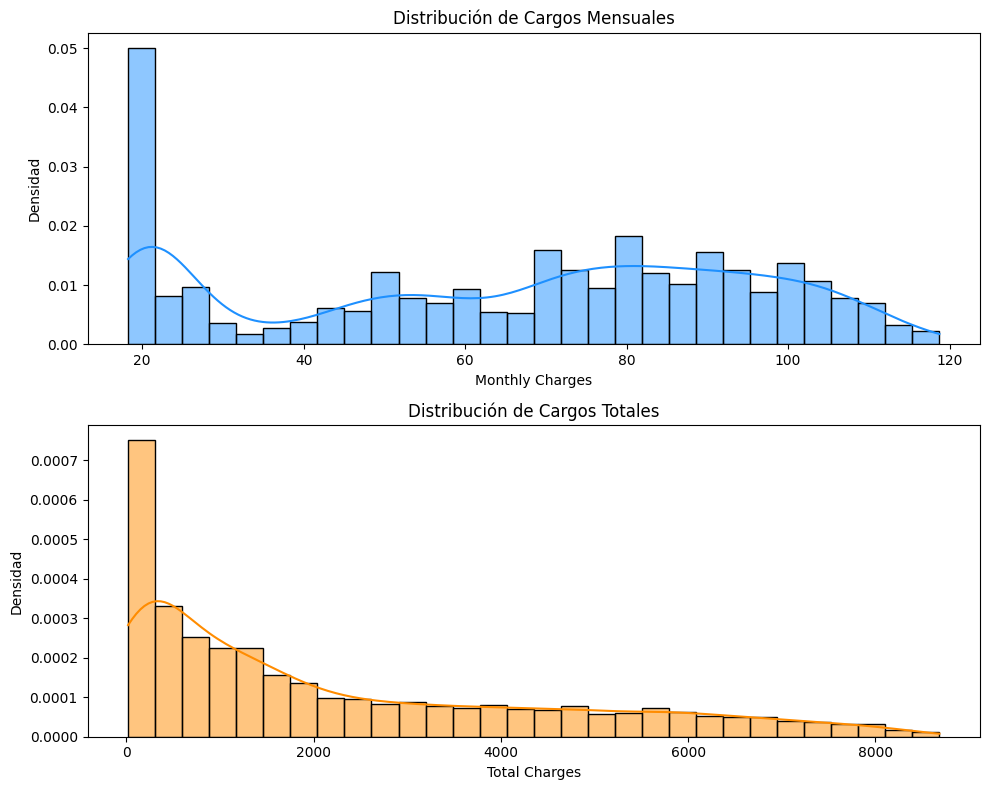

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura con dos subplots (uno debajo del otro)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # 2 filas, 1 columna

# Gráfico para 'account.Charges.Monthly'
sns.histplot(df_normalized['account.Charges.Monthly'],
             kde=True,
             color='dodgerblue',
             bins=30,
             stat='density',
             ax=axes[0])
axes[0].set_title('Distribución de Cargos Mensuales')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Densidad')

# Gráfico para 'account.Charges.Total'
sns.histplot(df_normalized['account.Charges.Total'],
             kde=True,
             color='darkorange',
             bins=30,
             stat='density',
             ax=axes[1])
axes[1].set_title('Distribución de Cargos Totales')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Densidad')

# Ajustar espacio entre los gráficos
plt.tight_layout()
plt.show()


## 3.2 Analisis de bivariables

### ☎ Servicio de telefonía

Se realizo un analisis de los usuarios que tienen **servicio de telefonia**, **con respecto al churn**, con datos donde se cumple las sigueinte condiciones, solamente tienen un servicio de telefonia o pude tener ambos servicios (telefonia y internet)

📊 **Grafico de barras para usarios que tienen y no tienen servicios de internet**

Tabla de contingencia:
Churn                 No   Yes
phone.PhoneService            
No                   510   170
Yes                 4653  1699

Porcentajes del total:
Churn                      No        Yes
phone.PhoneService                      
No                   7.252560   2.417520
Yes                 66.168942  24.160978
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Porcentajes del total de registros (n=7032):
Churn                  No    Yes
phone.PhoneService              
No                   7.25   2.42
Yes                 66.17  24.16


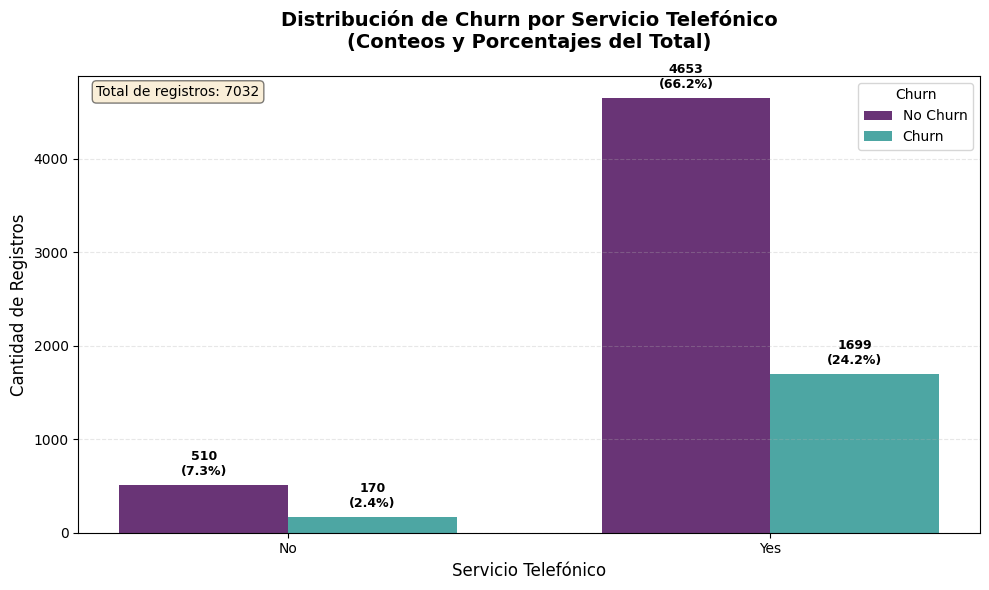


Resumen estadístico:
Total de registros: 7032

Distribución por Phone Service:
  Yes: 6352 (90.3%)
  No: 680 (9.7%)

Distribución por Churn:
  No: 5163 (73.4%)
  Yes: 1869 (26.6%)


In [31]:


# Usar tu dataset real (reemplaza esta línea con tu df_normalized)
# df_normalized = tu_dataframe_real

# Calcular el total de registros
total_records = len(df_normalized)

# Crear la tabla de contingencia
contingency_table = pd.crosstab(df_normalized['phone.PhoneService'], df_normalized['Churn'])
print("Tabla de contingencia:")
print(contingency_table)

# Calcular porcentajes del total
percentage_table = (contingency_table / total_records) * 100
print("\nPorcentajes del total:")
print(percentage_table)
print('x'*30)
print(f"\nPorcentajes del total de registros (n={total_records}):")
print(percentage_table.round(2))

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Obtener las posiciones de las barras
x_pos = np.arange(len(contingency_table.index))
width = 0.35

# Crear las barras para cada categoría de Churn
bars1 = plt.bar(x_pos - width/2, contingency_table['No'], width,
                label='No Churn', color='#440154', alpha=0.8)
bars2 = plt.bar(x_pos + width/2, contingency_table['Yes'], width,
                label='Churn', color='#21908C', alpha=0.8)

# Función para agregar etiquetas de porcentaje en las barras
def add_percentage_labels(bars, values_table, total):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        percentage = (height / total) * 100
        plt.text(bar.get_x() + bar.get_width()/2., height + total*0.01,
                f'{height}\n({percentage:.1f}%)',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Agregar etiquetas de porcentaje
add_percentage_labels(bars1, percentage_table, total_records)
add_percentage_labels(bars2, percentage_table, total_records)

# Personalizar el gráfico
plt.title('Distribución de Churn por Servicio Telefónico\n(Conteos y Porcentajes del Total)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Servicio Telefónico', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.xticks(x_pos, contingency_table.index)
plt.legend(title='Churn', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Agregar información del total en el gráfico
plt.text(0.02, 0.98, f'Total de registros: {total_records}',
         transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Mostrar resumen estadístico
print(f"\nResumen estadístico:")
print(f"Total de registros: {total_records}")
print("\nDistribución por Phone Service:")
phone_dist = df_normalized['phone.PhoneService'].value_counts()
for service, count in phone_dist.items():
    print(f"  {service}: {count} ({count/total_records*100:.1f}%)")

print("\nDistribución por Churn:")
churn_dist = df_normalized['Churn'].value_counts()
for churn, count in churn_dist.items():
    print(f"  {churn}: {count} ({count/total_records*100:.1f}%)")

De las persona que tiene un servicio telefonico, el 24% no se mantienen con los  servicio que prestan telecom, eso corresponde a mas del 90% de las persona no siguen con algun servicio de telecom

📊 **Grafico de barras de usuarios con o sin multiples lineas**

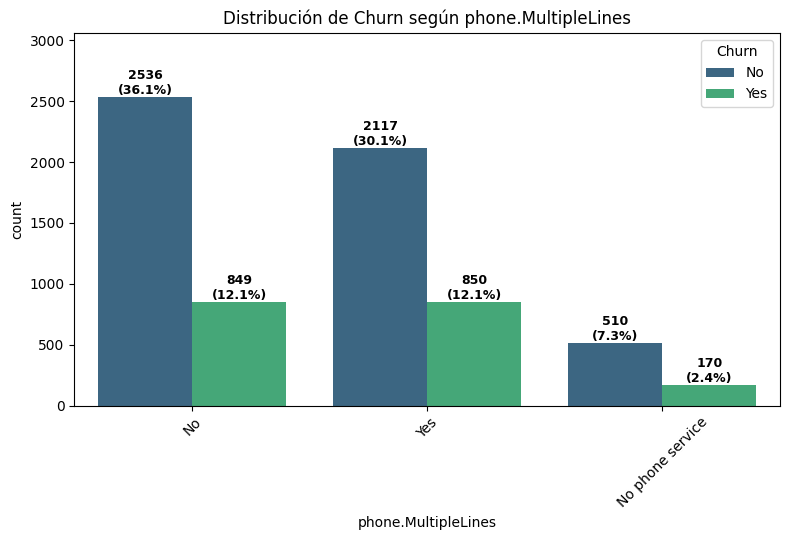

In [32]:
# Columna que estamos graficando
col = 'phone.MultipleLines'

# Total de registros del dataset
total_records = len(df_normalized)

plt.figure(figsize=(8, 5.5))
ax = sns.countplot(
    data=df_normalized,
    x=col,
    hue='Churn',
    palette='viridis'
)

# Título y formato básicos
plt.title(f'Distribución de Churn según {col}')
plt.xticks(rotation=45)

# ── Etiquetas de conteo y porcentaje ───────────────────────────
for patch in ax.patches:
    count = int(patch.get_height())               # altura de la barra
    if count == 0:
        continue                                  # evita división por 0
    pct   = 100 * count / total_records           # % sobre el total
    ax.annotate(
        f'{count}\n({pct:.1f}%)',                 # texto: conteo y %
        (patch.get_x() + patch.get_width() / 2,   # posición x
         patch.get_height()),                     # posición y
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

# Ajustar límites del eje Y para dar más espacio a las etiquetas
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.15)  # Aumenta el límite superior en 15%

plt.tight_layout()
plt.show()

No hay diferencias de desercion de usarios cuando tienen multiples o solamente tiene una.

conclusion:

La utilizacion del servcio telefonico es una de las principales causas para desertar de los servicios de la empresa

### 📡Servicio de internet

Se realizo un analisis estadistico para los usarios que **utilizan servicio de internet**, con respecto a Churn, y **con** datos de la union de usarios que solamente internet o tiene ambos servicios (telefonia y internet)

**📊 Grafico de barras con los tipos de provedores de internet**

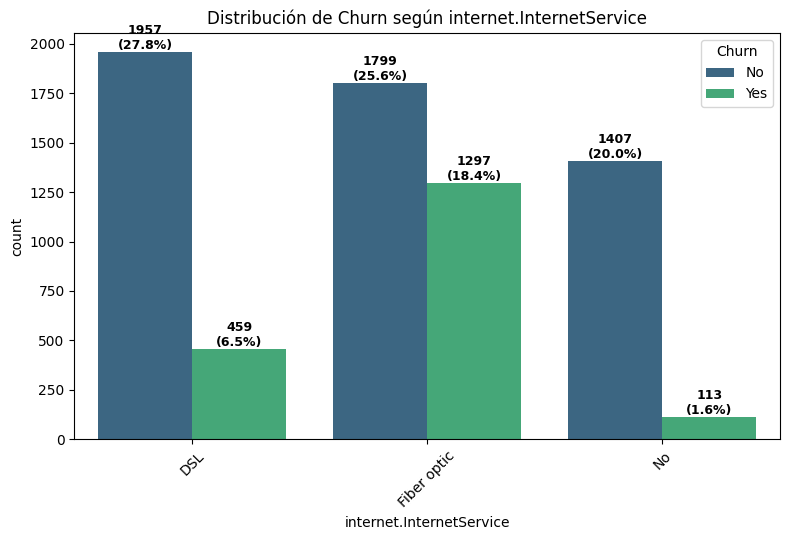

In [33]:
# Columna que estamos graficando

col = 'internet.InternetService'

# Total de registros del dataset
total_records = len(df_normalized)

plt.figure(figsize=(8, 5.5))
ax = sns.countplot(
    data=df_normalized,
    x=col,
    hue='Churn',
    palette='viridis'
)

# Título y formato básicos
plt.title(f'Distribución de Churn según {col}')
plt.xticks(rotation=45)

# ── Etiquetas de conteo y porcentaje ───────────────────────────
for patch in ax.patches:
    count = int(patch.get_height())               # altura de la barra
    if count == 0:
        continue                                  # evita división por 0
    pct   = 100 * count / total_records           # % sobre el total
    ax.annotate(
        f'{count}\n({pct:.1f}%)',                 # texto: conteo y %
        (patch.get_x() + patch.get_width() / 2,   # posición x
         patch.get_height()),                     # posición y
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

# Ajustar límites del eje Y para dar más espacio a las etiquetas
#y_max = ax.get_ylim()[1]
#ax.set_ylim(0, y_max * 1.15)  # Aumenta el límite superior en 15%

plt.tight_layout()
plt.show()

📊 **Grafico de barras con usarios que tienen y no tienen provedores de internet**



Distribución original:
internet.InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

Distribución agrupada:
internet_grouped
Con Internet    5512
Sin Internet    1520
Name: count, dtype: int64


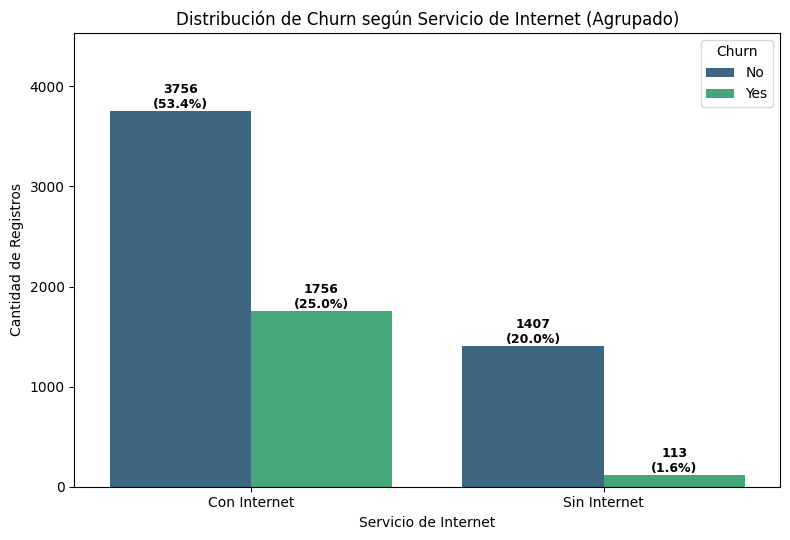


Total de registros: 7032

Distribución detallada:
Churn               No   Yes   All
internet_grouped                  
Con Internet      3756  1756  5512
Sin Internet      1407   113  1520
All               5163  1869  7032


In [34]:

#Copia de dataset
df_normalizedcopy = df_normalized.copy()
# Crear una nueva columna agrupada para Internet Service
df_normalizedcopy['internet_grouped'] = df_normalizedcopy['internet.InternetService'].map({
    'DSL': 'Con Internet',
    'Fiber optic': 'Con Internet',
    'No': 'Sin Internet'
})

# Verificar la nueva agrupación
print("Distribución original:")
print(df_normalizedcopy['internet.InternetService'].value_counts())
print("\nDistribución agrupada:")
print(df_normalizedcopy['internet_grouped'].value_counts())

# Columna que estamos graficando
col = 'internet_grouped'

# Total de registros del dataset
total_records = len(df_normalizedcopy)

plt.figure(figsize=(8, 5.5))
ax = sns.countplot(
    data=df_normalizedcopy,
    x=col,
    hue='Churn',
    palette='viridis'
)

# Título y formato básicos
plt.title('Distribución de Churn según Servicio de Internet (Agrupado)')
plt.xlabel('Servicio de Internet')
plt.ylabel('Cantidad de Registros')

# ── Etiquetas de conteo y porcentaje ───────────────────────────
for patch in ax.patches:
    count = int(patch.get_height())               # altura de la barra
    if count == 0:
        continue                                  # evita división por 0
    pct   = 100 * count / total_records           # % sobre el total
    ax.annotate(
        f'{count}\n({pct:.1f}%)',                 # texto: conteo y %
        (patch.get_x() + patch.get_width() / 2,   # posición x
         patch.get_height()),                     # posición y
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

# Ajustar límites del eje Y para dar más espacio a las etiquetas
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.15)  # Aumenta el límite superior en 15%

plt.tight_layout()
plt.show()

# Mostrar estadísticas adicionales
print(f"\nTotal de registros: {total_records}")
print("\nDistribución detallada:")
crosstab = pd.crosstab(df_normalizedcopy['internet_grouped'], df_normalizedcopy['Churn'], margins=True)
print(crosstab)

El 25% de los que tienen servicio de internet cancelan los servicios con la empresa, en comparacion, con los que no tienen servicio de internet, que solamente el 1.6% cancelan los servicio con la empresa.

los usarios que tienen el servicio de internet de fibra optica (18.4 %), son lo que mas cancelan los servicios de la empresa.

por lo tanto, tener servico de internet tambien es una de las causas de  cancelacion de los servicios de la empresa



### Servicio de telefonia: unico servicio

📊 **Grafico de barras de los usuarios que tiene solomente usan el servicio de telefonia**

Distribución de la nueva columna 'categoria_servicio':
categoria_servicio
Ambos Servicios    4832
Solo Teléfono      1520
Solo Internet       680
Name: count, dtype: int64


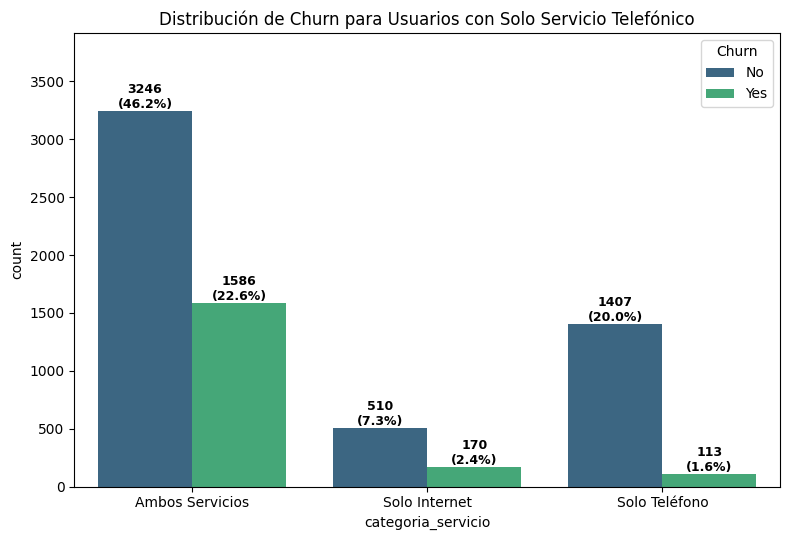

In [35]:
# Create a new column 'categoria_servicio' based on conditions
df_normalizedcopy['categoria_servicio'] = 'Otros' # Initialize with a default value

# Assign 'Solo Teléfono' to rows meeting the criteria (only phone, no internet)
df_normalizedcopy.loc[
    (df_normalizedcopy['internet.InternetService'] == "No") &
    (df_normalizedcopy['phone.PhoneService'] == "Yes"),
    'categoria_servicio'
] = 'Solo Teléfono'

# Assign 'Solo Internet' to rows meeting the criteria (only internet, no phone)
df_normalizedcopy.loc[
    (df_normalizedcopy['internet_grouped'] == "Con Internet") &
    (df_normalizedcopy['phone.PhoneService'] == "No"),
    'categoria_servicio'
] = 'Solo Internet'

# Assign 'Ambos Servicios' to rows meeting the criteria (both internet and phone)
df_normalizedcopy.loc[
    (df_normalizedcopy['internet_grouped'] == "Con Internet") &
    (df_normalizedcopy['phone.PhoneService'] == "Yes"),
    'categoria_servicio'
] = 'Ambos Servicios'

# Verify the new column and its distribution
print("Distribución de la nueva columna 'categoria_servicio':")
print(df_normalizedcopy['categoria_servicio'].value_counts())

# Create the dataframe for users with only phone service


# Columna que estamos graficando
col = 'categoria_servicio'

# Total de registros del dataset original for percentage calculation
total_records = len(df_normalized)

plt.figure(figsize=(8, 5.5))
ax = sns.countplot(
    data = df_normalizedcopy,
    x=col,
    hue='Churn',
    palette='viridis'
)

# Título y formato básicos
plt.title(f'Distribución de Churn para Usuarios con Solo Servicio Telefónico')
plt.xticks(rotation=0) # No rotation needed for a single category

# ── Etiquetas de conteo y porcentaje ───────────────────────────
for patch in ax.patches:
    count = int(patch.get_height())               # altura de la barra
    if count == 0:
        continue                                  # evita división por 0
    pct   = 100 * count / total_records           # % sobre el total
    ax.annotate(
        f'{count}\n({pct:.1f}%)',                 # texto: conteo y %
        (patch.get_x() + patch.get_width() / 2,   # posición x
         patch.get_height()),                     # posición y
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

# Ajustar límites del eje Y para dar más espacio a las etiquetas
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.15)  # Aumenta el límite superior en 15%

plt.tight_layout()
plt.show()

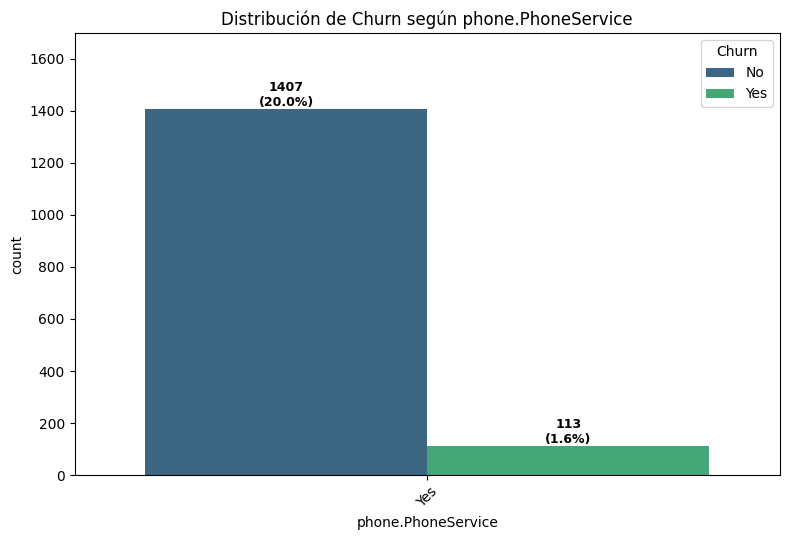

In [36]:
#df_servicios_phone = df_normalizedcopy.query('`internet.InternetService` == "No" and `phone.PhoneService` == "Yes"')

# Columna que estamos graficando
col = 'phone.PhoneService'

# Total de registros del dataset
total_records = len(df_normalized)

plt.figure(figsize=(8, 5.5))
ax = sns.countplot(
    data = df_normalizedcopy.query('`internet.InternetService` == "No" and `phone.PhoneService` == "Yes"'),
    x=col,
    hue='Churn',
    palette='viridis'
)

# Título y formato básicos
plt.title(f'Distribución de Churn según {col}')
plt.xticks(rotation=45)

# ── Etiquetas de conteo y porcentaje ───────────────────────────
for patch in ax.patches:
    count = int(patch.get_height())               # altura de la barra
    if count == 0:
        continue                                  # evita división por 0
    pct   = 100 * count / total_records           # % sobre el total
    ax.annotate(
        f'{count}\n({pct:.1f}%)',                 # texto: conteo y %
        (patch.get_x() + patch.get_width() / 2,   # posición x
         patch.get_height()),                     # posición y
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

# Ajustar límites del eje Y para dar más espacio a las etiquetas
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.15)  # Aumenta el límite superior en 15%

plt.tight_layout()
plt.show()

Tener solamente el servicio de telefonoia, no es unos de los generador de desercion de usuarios.

📊 **Grafico de barras de usuarios de telefonia que tienen o no multiples lineas**

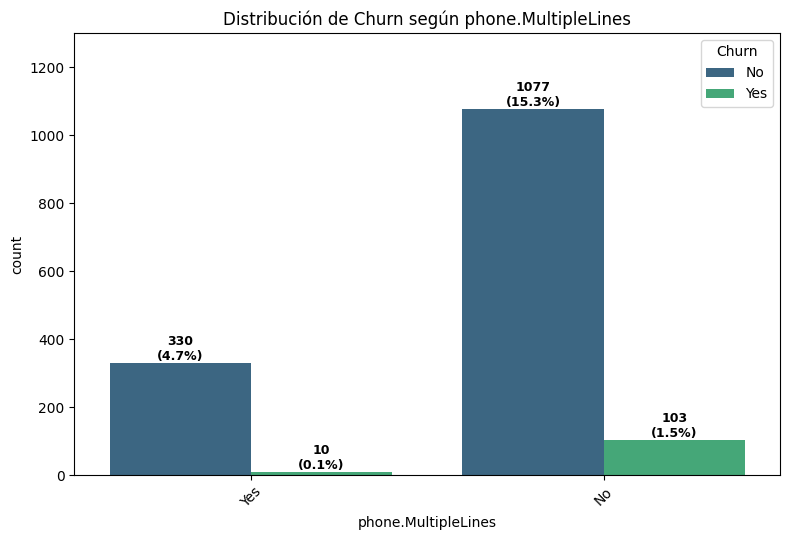

In [37]:
#df_servicios_phone = df_normalizedcopy.query('`internet.InternetService` == "No" and `phone.PhoneService` == "Yes"')

# Columna que estamos graficando
col = 'phone.MultipleLines'

# Total de registros del dataset
total_records = len(df_normalized)

plt.figure(figsize=(8, 5.5))
ax = sns.countplot(
    data = df_normalizedcopy.query('`internet.InternetService` == "No" and `phone.PhoneService` == "Yes"'),
    x=col,
    hue='Churn',
    palette='viridis'
)

# Título y formato básicos
plt.title(f'Distribución de Churn según {col}')
plt.xticks(rotation=45)

# ── Etiquetas de conteo y porcentaje ───────────────────────────
for patch in ax.patches:
    count = int(patch.get_height())               # altura de la barra
    if count == 0:
        continue                                  # evita división por 0
    pct   = 100 * count / total_records           # % sobre el total
    ax.annotate(
        f'{count}\n({pct:.1f}%)',                 # texto: conteo y %
        (patch.get_x() + patch.get_width() / 2,   # posición x
         patch.get_height()),                     # posición y
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

# Ajustar límites del eje Y para dar más espacio a las etiquetas
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.15)  # Aumenta el límite superior en 15%

plt.tight_layout()
plt.show()

Lo usarios que no tienen multiples lineas es mas probables, que deserten los sevicios de la empresa (1.5%)

### Servicio de internet: unico servicio

📊 **Grafico de barras de usario que solamente tienen serivico de internet con respecto a Churn**

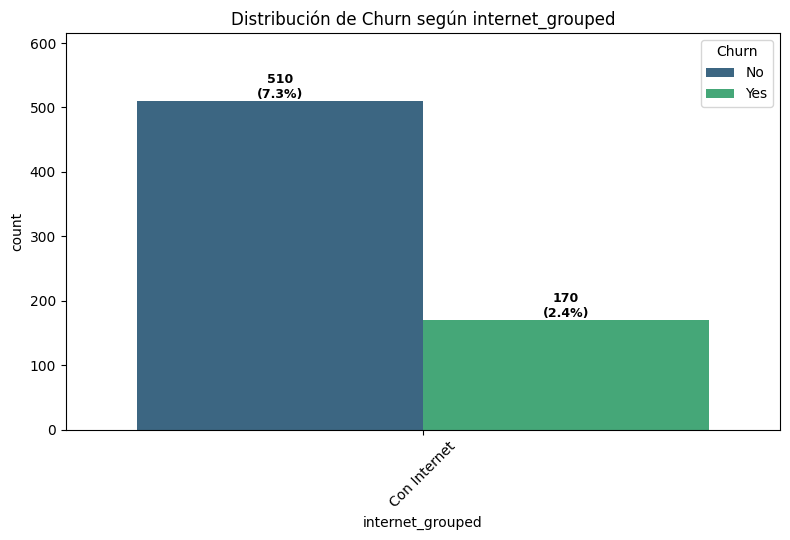

In [38]:

# Columna que estamos graficando
col = 'internet_grouped'

# Total de registros del dataset
total_records = len(df_normalized)

plt.figure(figsize=(8, 5.5))
ax = sns.countplot(
    data = df_normalizedcopy.query('`internet_grouped` == "Con Internet" and `phone.PhoneService` == "No"'),
    x=col,
    hue='Churn',
    palette='viridis'
)

# Título y formato básicos
plt.title(f'Distribución de Churn según {col}')
plt.xticks(rotation=45)

# ── Etiquetas de conteo y porcentaje ───────────────────────────
for patch in ax.patches:
    count = int(patch.get_height())               # altura de la barra
    if count == 0:
        continue                                  # evita división por 0
    pct   = 100 * count / total_records           # % sobre el total
    ax.annotate(
        f'{count}\n({pct:.1f}%)',                 # texto: conteo y %
        (patch.get_x() + patch.get_width() / 2,   # posición x
         patch.get_height()),                     # posición y
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

# Ajustar límites del eje Y para dar más espacio a las etiquetas
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.15)  # Aumenta el límite superior en 15%

plt.tight_layout()
plt.show()

los usarios que solamente tienen servicio de internet, tiene baja (2.4%) desertacion de los servicios de la empresa, en comparacion, con el 25% del grafico anterior que correspoden a los tienen solamente el servico de internet o telefonia, y los que tiene ambos servicios (telefonia y internet)

### **Usuarios que usan ambos servicios telefonia y internet**

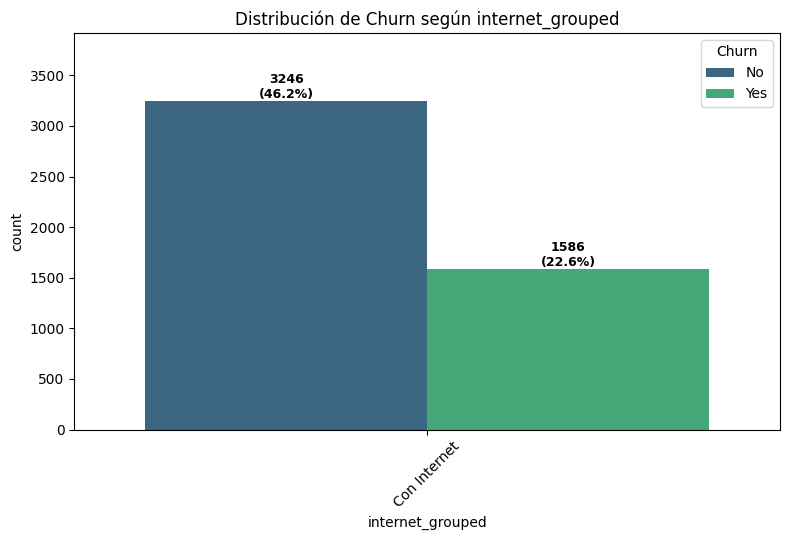

In [39]:

# Columna que estamos graficando
col = 'internet_grouped'

# Total de registros del dataset
total_records = len(df_normalized)

plt.figure(figsize=(8, 5.5))
ax = sns.countplot(
    data = df_normalizedcopy.query('`internet_grouped` == "Con Internet" and `phone.PhoneService` == "Yes"'),
    x=col,
    hue='Churn',
    palette='viridis'
)

# Título y formato básicos
plt.title(f'Distribución de Churn según {col}')
plt.xticks(rotation=45)

# ── Etiquetas de conteo y porcentaje ───────────────────────────
for patch in ax.patches:
    count = int(patch.get_height())               # altura de la barra
    if count == 0:
        continue                                  # evita división por 0
    pct   = 100 * count / total_records           # % sobre el total
    ax.annotate(
        f'{count}\n({pct:.1f}%)',                 # texto: conteo y %
        (patch.get_x() + patch.get_width() / 2,   # posición x
         patch.get_height()),                     # posición y
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

# Ajustar límites del eje Y para dar más espacio a las etiquetas
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.15)  # Aumenta el límite superior en 15%

plt.tight_layout()
plt.show()

In [41]:
df_ambos_servicios=df_normalizedcopy.query('`internet_grouped` == "Con Internet" and `phone.PhoneService` == "Yes"')
df_ambos_servicios.sample()

customerID Churn customer.gender customer.SeniorCitizen  \
6163  8436-BJUMM   Yes            Male                     No   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
6163              Yes                 Yes               26                Yes   

     phone.MultipleLines internet.InternetService  ... internet.StreamingTV  \
6163                 Yes              Fiber optic  ...                  Yes   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
6163                       No   Month-to-month                      Yes   

     account.PaymentMethod account.Charges.Monthly account.Charges.Total  \
6163      Electronic check                   83.75                2070.6   

     cuentas_diarias internet_grouped  categoria_servicio  
6163        2.791667     Con Internet     Ambos Servicios  

[1 rows x 24 columns]

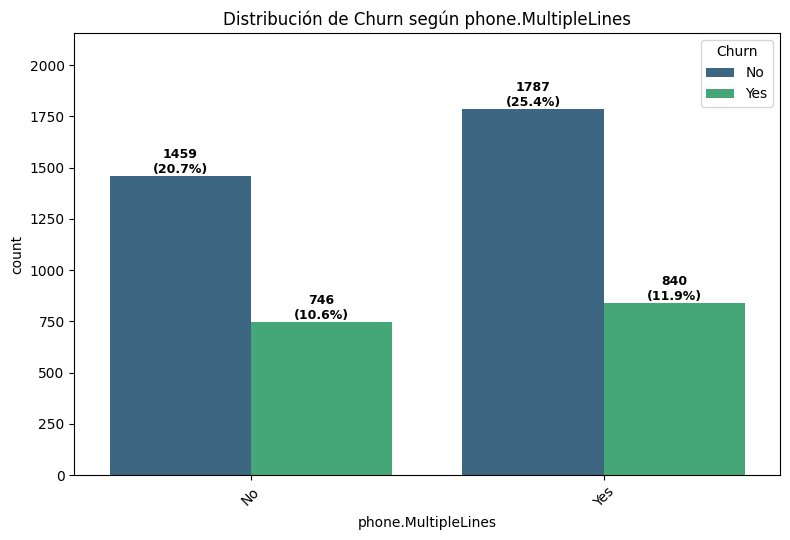

In [42]:
# Columna que estamos graficando
col = 'phone.MultipleLines'

# Total de registros del dataset
total_records = len(df_normalized)

plt.figure(figsize=(8, 5.5))
ax = sns.countplot(
    data = df_ambos_servicios,
    x=col,
    hue='Churn',
    palette='viridis'
)

# Título y formato básicos
plt.title(f'Distribución de Churn según {col}')
plt.xticks(rotation=45)

# ── Etiquetas de conteo y porcentaje ───────────────────────────
for patch in ax.patches:
    count = int(patch.get_height())               # altura de la barra
    if count == 0:
        continue                                  # evita división por 0
    pct   = 100 * count / total_records           # % sobre el total
    ax.annotate(
        f'{count}\n({pct:.1f}%)',                 # texto: conteo y %
        (patch.get_x() + patch.get_width() / 2,   # posición x
         patch.get_height()),                     # posición y
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

# Ajustar límites del eje Y para dar más espacio a las etiquetas
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.15)  # Aumenta el límite superior en 15%

plt.tight_layout()
plt.show()

Distribución de la nueva columna 'categoria_servicio':
categoria_servicio
Ambos Servicios    4832
Solo Teléfono      1520
Solo Internet       680
Name: count, dtype: int64


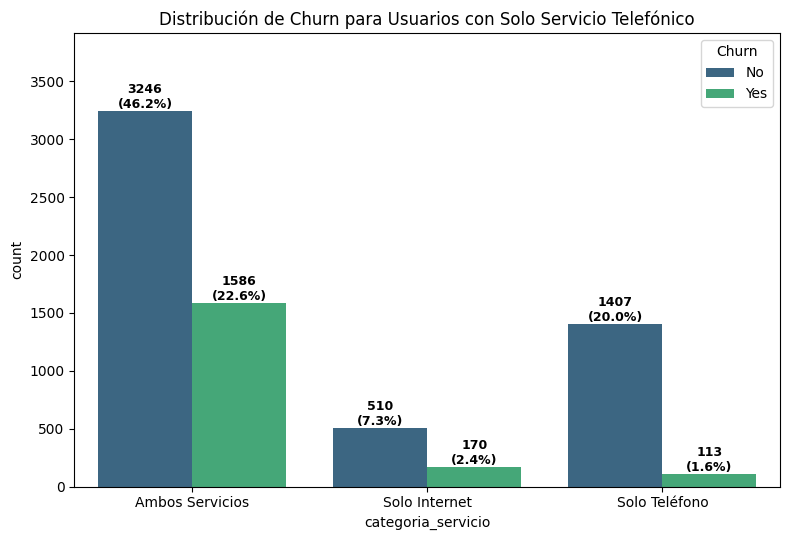

In [43]:
# Create a new column 'categoria_servicio' based on conditions
df_normalizedcopy['categoria_servicio'] = 'Otros' # Initialize with a default value

# Assign 'Solo Teléfono' to rows meeting the criteria (only phone, no internet)
df_normalizedcopy.loc[
    (df_normalizedcopy['internet.InternetService'] == "No") &
    (df_normalizedcopy['phone.PhoneService'] == "Yes"),
    'categoria_servicio'
] = 'Solo Teléfono'

# Assign 'Solo Internet' to rows meeting the criteria (only internet, no phone)
df_normalizedcopy.loc[
    (df_normalizedcopy['internet_grouped'] == "Con Internet") &
    (df_normalizedcopy['phone.PhoneService'] == "No"),
    'categoria_servicio'
] = 'Solo Internet'

# Assign 'Ambos Servicios' to rows meeting the criteria (both internet and phone)
df_normalizedcopy.loc[
    (df_normalizedcopy['internet_grouped'] == "Con Internet") &
    (df_normalizedcopy['phone.PhoneService'] == "Yes"),
    'categoria_servicio'
] = 'Ambos Servicios'

# Verify the new column and its distribution
print("Distribución de la nueva columna 'categoria_servicio':")
print(df_normalizedcopy['categoria_servicio'].value_counts())

# Create the dataframe for users with only phone service


# Columna que estamos graficando
col = 'categoria_servicio'

# Total de registros del dataset original for percentage calculation
total_records = len(df_normalized)

plt.figure(figsize=(8, 5.5))
ax = sns.countplot(
    data = df_normalizedcopy,
    x=col,
    hue='Churn',
    palette='viridis'
)

# Título y formato básicos
plt.title(f'Distribución de Churn para Usuarios con Solo Servicio Telefónico')
plt.xticks(rotation=0) # No rotation needed for a single category

# ── Etiquetas de conteo y porcentaje ───────────────────────────
for patch in ax.patches:
    count = int(patch.get_height())               # altura de la barra
    if count == 0:
        continue                                  # evita división por 0
    pct   = 100 * count / total_records           # % sobre el total
    ax.annotate(
        f'{count}\n({pct:.1f}%)',                 # texto: conteo y %
        (patch.get_x() + patch.get_width() / 2,   # posición x
         patch.get_height()),                     # posición y
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

# Ajustar límites del eje Y para dar más espacio a las etiquetas
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.15)  # Aumenta el límite superior en 15%

plt.tight_layout()
plt.show()

En el anterior grafico se puede observar que solo internet y solo telefono,suma el 4% de usarios que desertan de los servicios a comparacion del porcentaje del total que es 26.5%, por lo tanto, el porcentaje de usarios que utlizan ambos servicios (22.6%), es un grupo representativo para analizar la desercion de los usuarios

igualmente, multiples lineas no hay difrencia en sus distribucion para usarios que desertan de los servcios de la empresa.

por lo tanto se **decidio continuar con el analisis**, con **los usarios que tienen ambos servicios**.

### 🔍 Analisis detallado de ambos servicios

se clasificron las columanas en x categorias segun cualidades de los usarios, utliadno usarios que tienen ambos servcios

In [44]:
df_normalizedcopy.head()
df_normalizedcopy.sample(15)

customerID Churn customer.gender customer.SeniorCitizen  \
1685  2386-OWURY    No          Female                     No   
5547  7596-LDUXP    No          Female                     No   
6445  8859-AXJZP    No            Male                     No   
4428  6064-ZATLR    No          Female                     No   
3825  5233-AOZUF    No          Female                     No   
2149  3006-XIMLN   Yes          Female                     No   
6968  9600-NAXZN   Yes            Male                     No   
1301  1866-ZSLJM    No            Male                     No   
4349  5968-VXZLG    No            Male                     No   
7083  9754-CLVZW    No          Female                     No   
7047  9708-HPXWZ    No            Male                    Yes   
4008  5481-NTDOH    No          Female                    Yes   
4439  6082-OQFBA    No            Male                     No   
4651  6369-MCAKO    No          Female                     No   
545   0774-RMNUW    No          Female                     No   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
1685               No                  No               58                Yes   
5547               No                  No               12                Yes   
6445              Yes                 Yes               39                Yes   
4428               No                  No               27                Yes   
3825              Yes                  No               29                Yes   
2149               No                 Yes                2                Yes   
6968               No                  No               43                Yes   
1301               No                  No               21                Yes   
4349               No                  No                2                Yes   
7083              Yes                 Yes               26                 No   
7047               No                  No                5                 No   
4008              Yes                  No               67                Yes   
4439              Yes                 Yes               23                Yes   
4651              Yes                 Yes               68                Yes   
545               Yes                 Yes               71                 No   

     phone.MultipleLines internet.InternetService  ... internet.StreamingTV  \
1685                  No              Fiber optic  ...                  Yes   
5547                  No              Fiber optic  ...                  Yes   
6445                 Yes                       No  ...  No internet service   
4428                  No                      DSL  ...                   No   
3825                 Yes              Fiber optic  ...                   No   
2149                 Yes              Fiber optic  ...                  Yes   
6968                 Yes              Fiber optic  ...                  Yes   
1301                  No                       No  ...  No internet service   
4349                  No                      DSL  ...                   No   
7083    No phone service                      DSL  ...                   No   
7047    No phone service                      DSL  ...                  Yes   
4008                 Yes              Fiber optic  ...                  Yes   
4439                  No                       No  ...  No internet service   
4651                 Yes                      DSL  ...                  Yes   
545     No phone service                      DSL  ...                  Yes   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
1685                      Yes   Month-to-month                      Yes   
5547                       No         One year                      Yes   
6445      No internet service         Two year                      Yes   
4428                       No         Two year                       No   
3825                       N

#### 🌏Categoria demografica

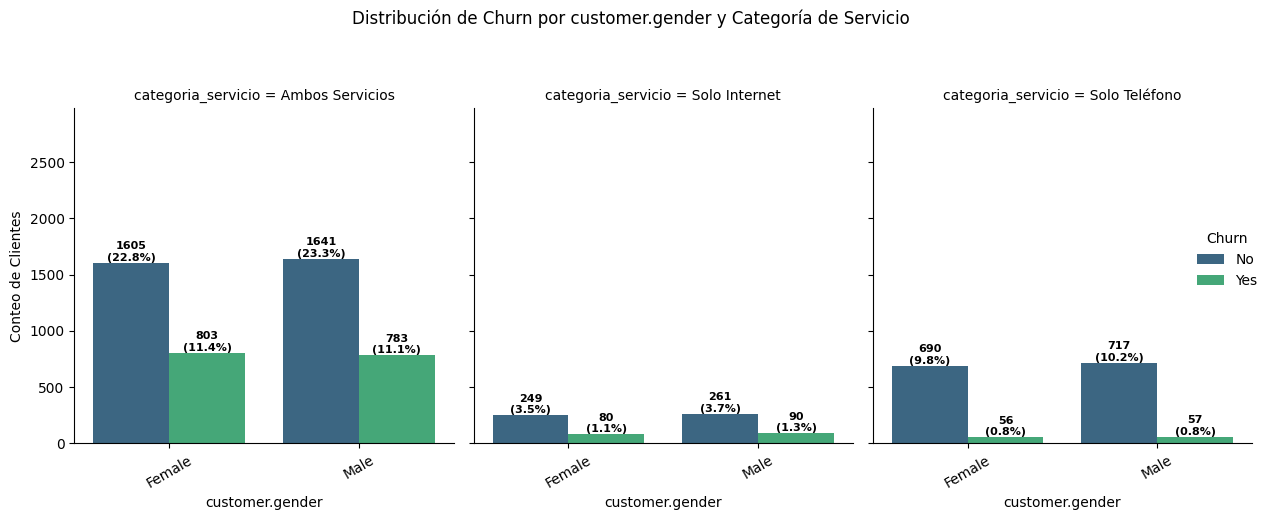

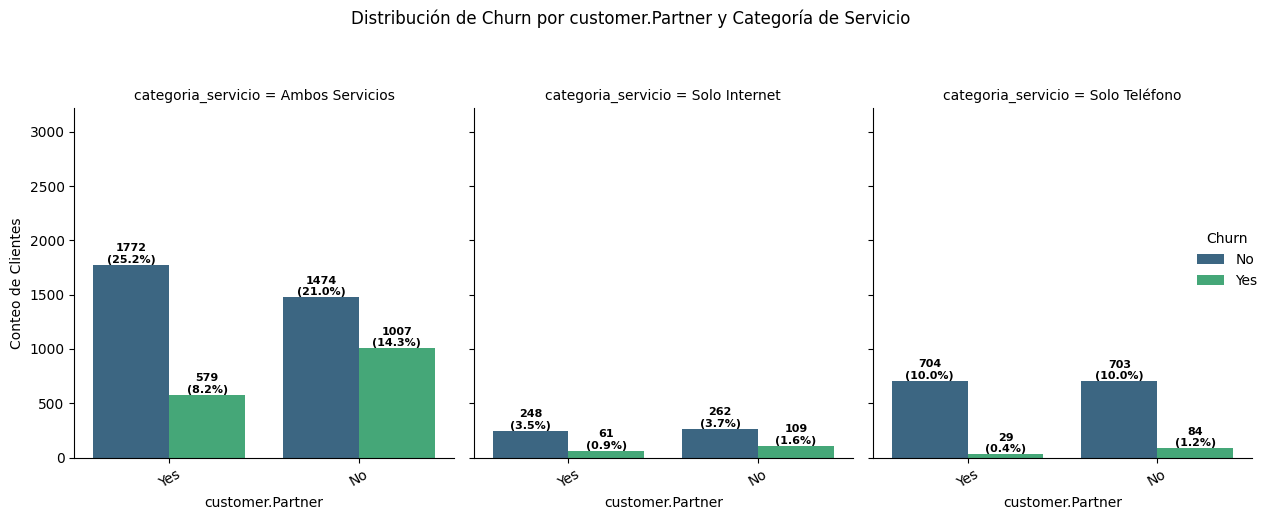

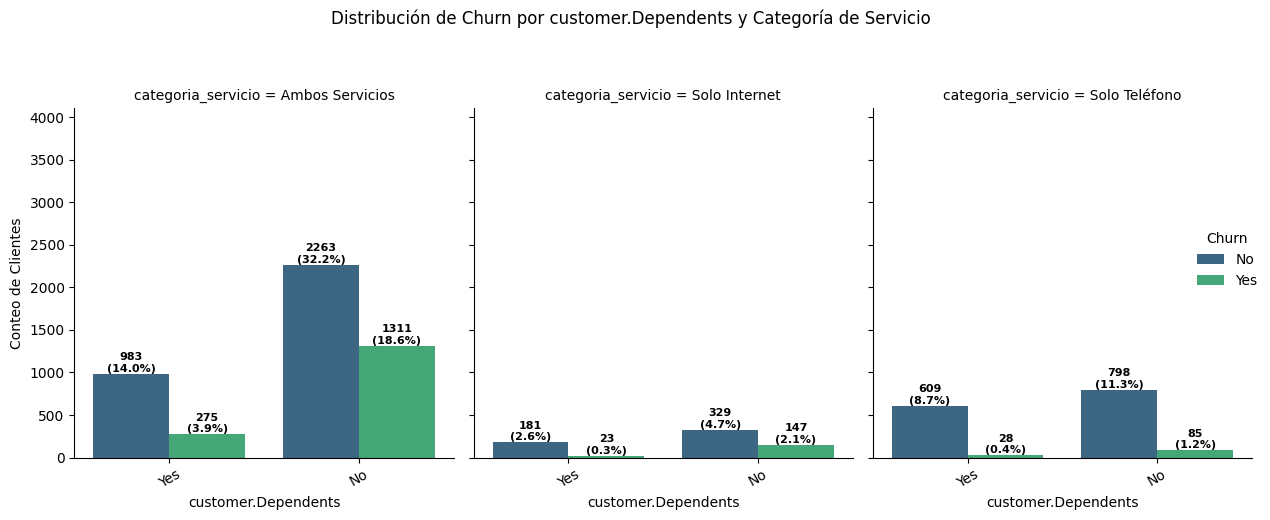

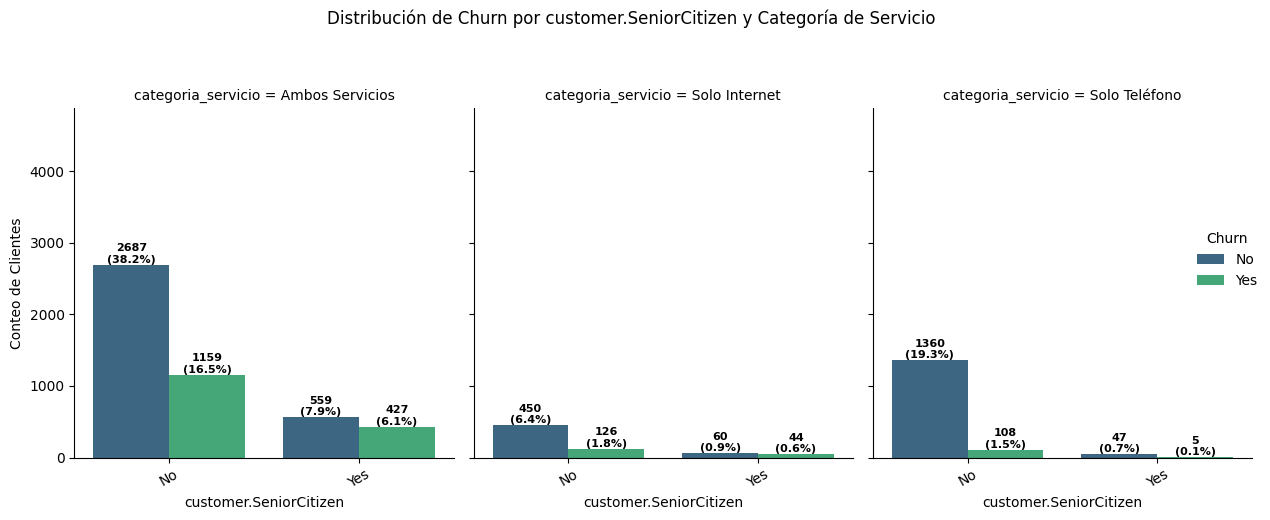

In [45]:
# Lista de columnas demográficas
categoria_demografica = [
    'customer.gender',
    'customer.Partner',
    'customer.Dependents',
    'customer.SeniorCitizen'
]

# Total de registros para calcular porcentajes (usando el df de ejemplo)
total_records = len(df_normalizedcopy)

# Iteramos sobre cada columna demográfica para crear un gráfico
for col in categoria_demografica:
    # Usamos catplot para crear subplots por 'categoria_servicio'
    g = sns.catplot(
        data= df_normalizedcopy,
        x=col,
        hue='Churn',
        col='categoria_servicio', # Esto crea los subplots
        kind='count',
        palette='viridis',
        height=5,
        aspect=0.8
    )

    # Título general para la figura
    g.fig.suptitle(f'Distribución de Churn por {col} y Categoría de Servicio', y=1.03)
    g.set_xticklabels(rotation=30)
    g.set_xlabels(f'{col}')
    g.set_ylabels('Conteo de Clientes')

    # ── Anotaciones de conteo y porcentaje ───────────────────────────
    # Iteramos sobre cada subplot (ax) en la figura
    for ax in g.axes.flat:
        # Iteramos sobre cada barra (patch) en el subplot
        for patch in ax.patches:
            count = int(patch.get_height())
            if count == 0:
                continue
            pct = 100 * count / total_records
            ax.annotate(
                f'{count}\n({pct:.1f}%)',
                (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                ha='center', va='bottom',
                fontsize=8, fontweight='bold'
            )
        # Ajustar límites del eje Y para dar espacio a las etiquetas
        if ax.get_ylim()[1] > 0: # Solo si hay datos
            y_max = ax.get_ylim()[1]
            ax.set_ylim(0, y_max * 1.20)

    plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajustar para el suptitle
    plt.show()

El genero no tiene efecto en la desicion de seguir con los servicios de la empresa, dado que los porcentajes son parejos para las tres categorias de servicios.

customer.Partner

En la categorias ambos servicios, tener pareja es un influyente para dejar de usar los servicios de la empresa (14%), con respecto al 8% que tiene pareja y desertan de la empresa.

customer.Dependents

En la categoria ambos servicios, no tener dependientes es unos de los influyentes para dejar de utlizar los servicios de la empresa (18%), al contrario, de tener dependientes 3.9%.

customer.SeniorCitizen

Tener menos de 65 años (16.5%), es un influyente para dejar la empresa al contario de usarios mayores de 65 que no dejan la empresa (6.1%).


#### 🛜Categoria servicios

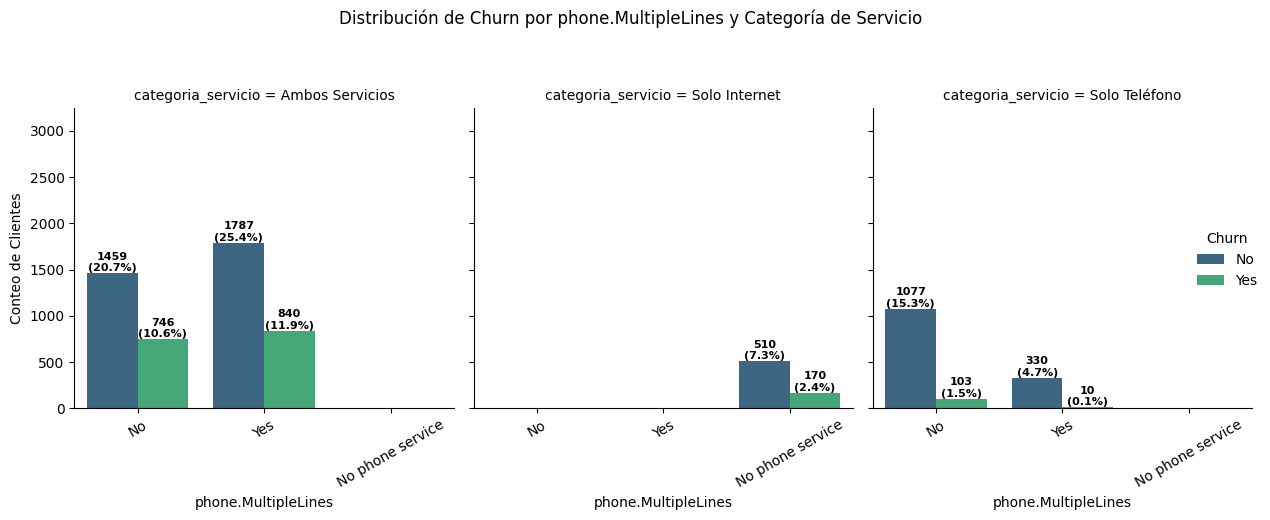

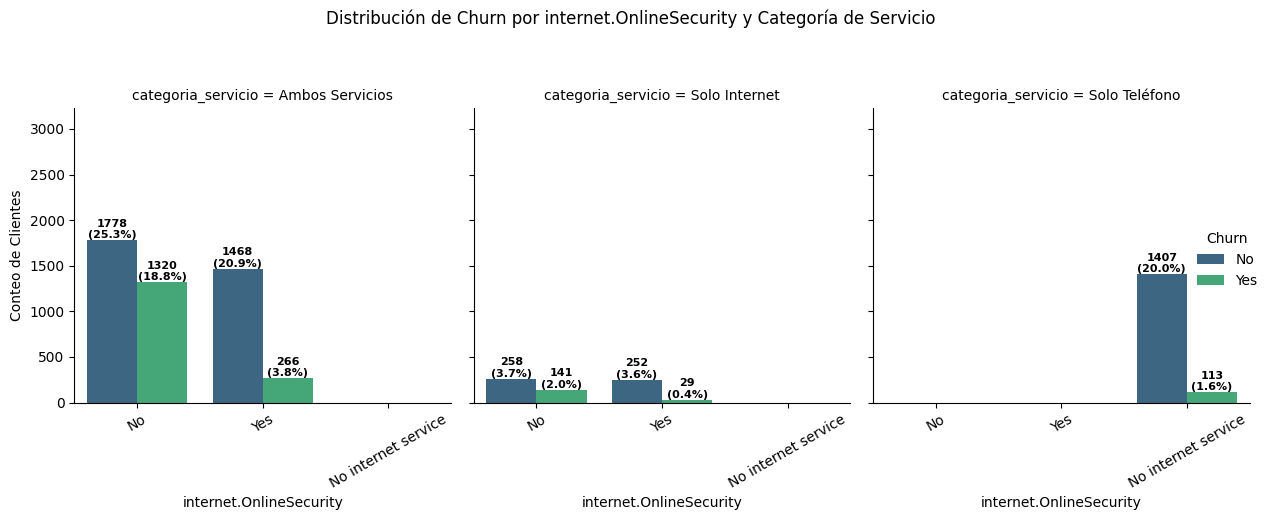

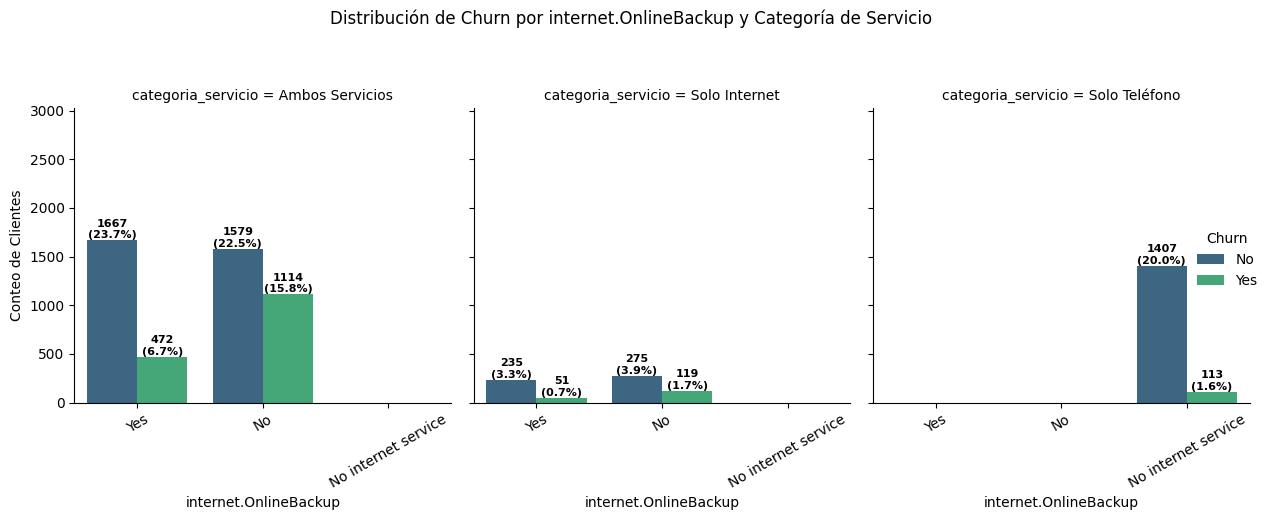

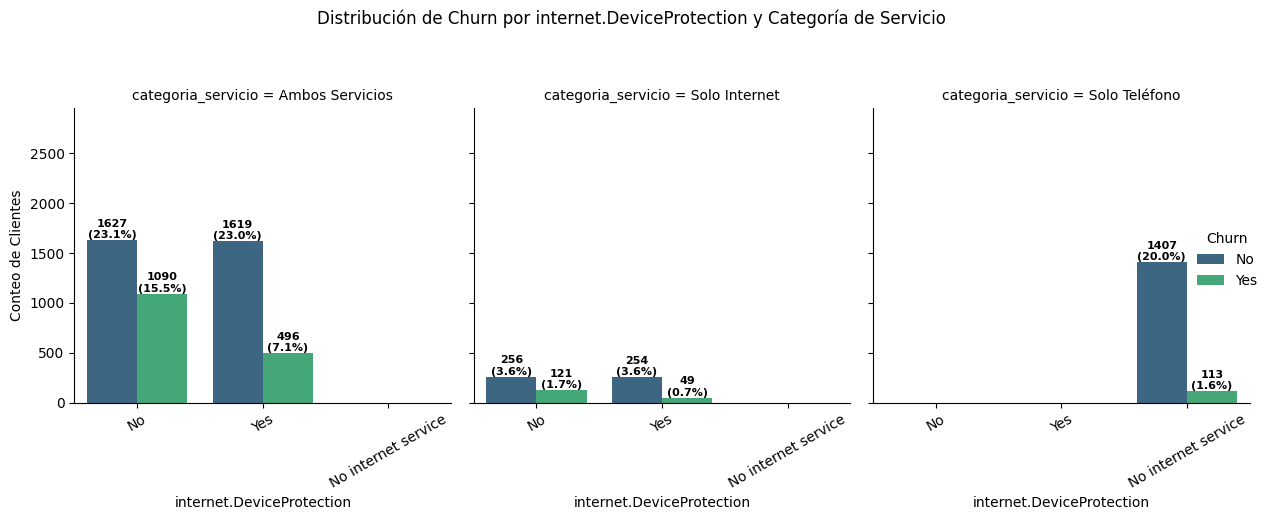

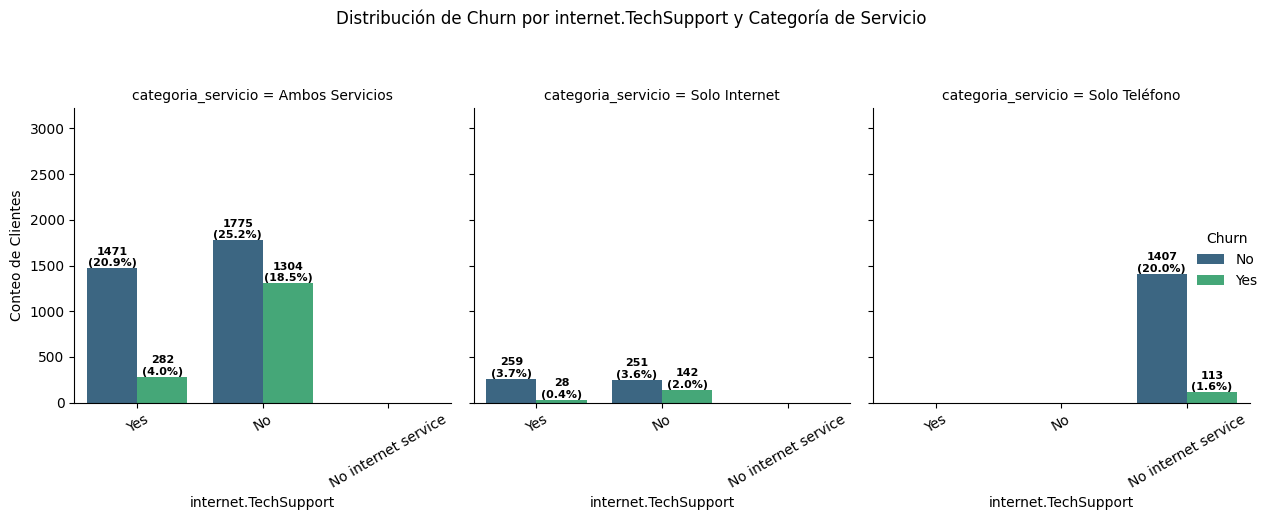

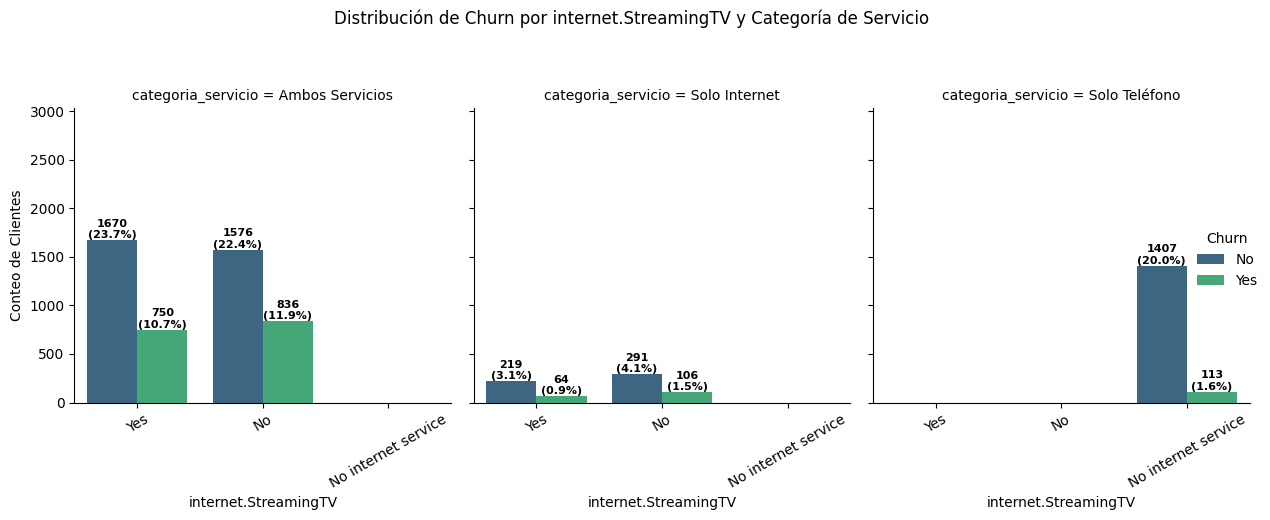

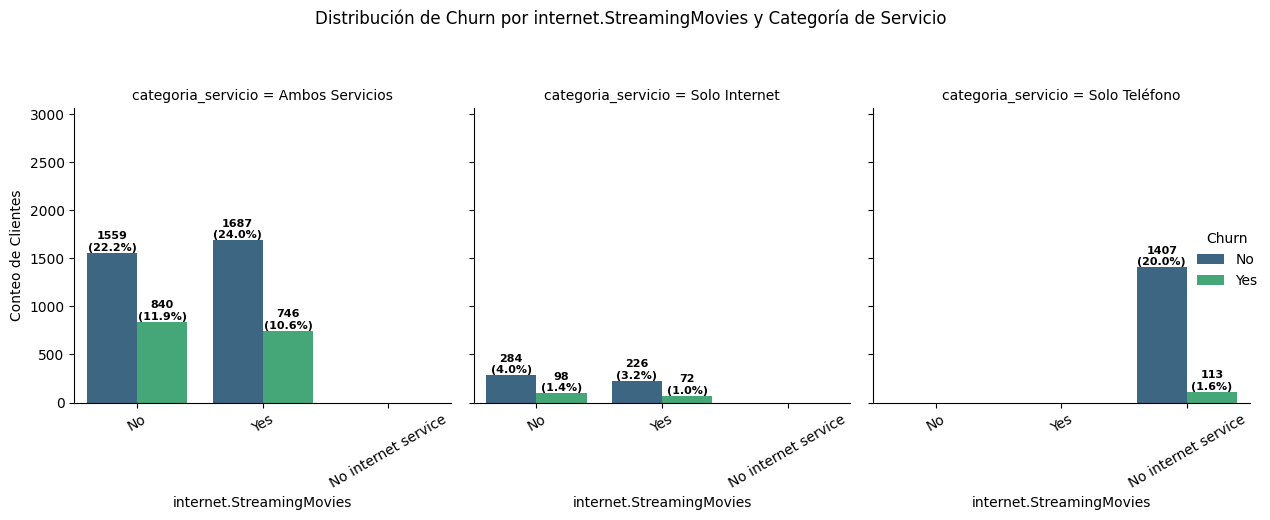

In [ ]:
# Lista de columnas demográficas
categoria_servicos = [
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]

# Total de registros para calcular porcentajes (usando el df de ejemplo)
total_records = len(df_normalizedcopy)

# Iteramos sobre cada columna demográfica para crear un gráfico
for col in categoria_servicos:
    # Usamos catplot para crear subplots por 'categoria_servicio'
    g = sns.catplot(
        data= df_normalizedcopy,
        x=col,
        hue='Churn',
        col='categoria_servicio', # Esto crea los subplots
        kind='count',
        palette='viridis',
        height=5,
        aspect=0.8
    )

    # Título general para la figura
    g.fig.suptitle(f'Distribución de Churn por {col} y Categoría de Servicio', y=1.03)
    g.set_xticklabels(rotation=30)
    g.set_xlabels(f'{col}')
    g.set_ylabels('Conteo de Clientes')

    # ── Anotaciones de conteo y porcentaje ───────────────────────────
    # Iteramos sobre cada subplot (ax) en la figura
    for ax in g.axes.flat:
        # Iteramos sobre cada barra (patch) en el subplot
        for patch in ax.patches:
            count = int(patch.get_height())
            if count == 0:
                continue
            pct = 100 * count / total_records
            ax.annotate(
                f'{count}\n({pct:.1f}%)',
                (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                ha='center', va='bottom',
                fontsize=8, fontweight='bold'
            )
        # Ajustar límites del eje Y para dar espacio a las etiquetas
        if ax.get_ylim()[1] > 0: # Solo si hay datos
            y_max = ax.get_ylim()[1]
            ax.set_ylim(0, y_max * 1.20)

    plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajustar para el suptitle
    plt.show()

internet.OnlineSecurity

En la ambos servcios no tener seguridad online es influyente en la permanencia del usario con la empresa, (18.8%)

Internet.OnlineBackup

En ambos servicios no tener onlinebackup es influyente para dejar la empresa 15%, comparado a tenerlo 6.7%

internet.DiviceProtection

para ambos servicios no tener DiviceProtection, es un influyente para dejar la empresa 15.5%,

internet.TechSupport

Para ambos servicios no tener Techsupport, es unos de los indicadores para dejar de usar los servicios de la empresa 18.5%

internet.StreamingTV

Para ambos servicio y solo tener internet, para streamingTV no afecta en seguir con los servicios de la empresa, se ve que los porcentje son parejos

internet.StreamingMovies
Para ambos servicio y solo tener internet, en streamingTV no afecta en seguir con los servicios de la empresa, se ve que los porcentje son parejos



#### 🧾Categoria comportamiento

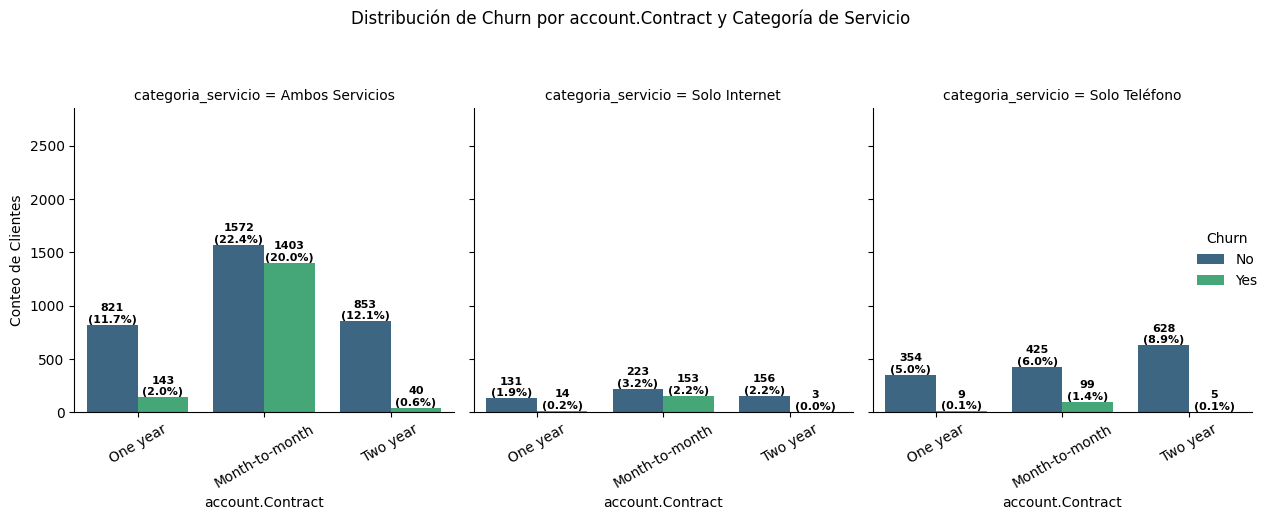

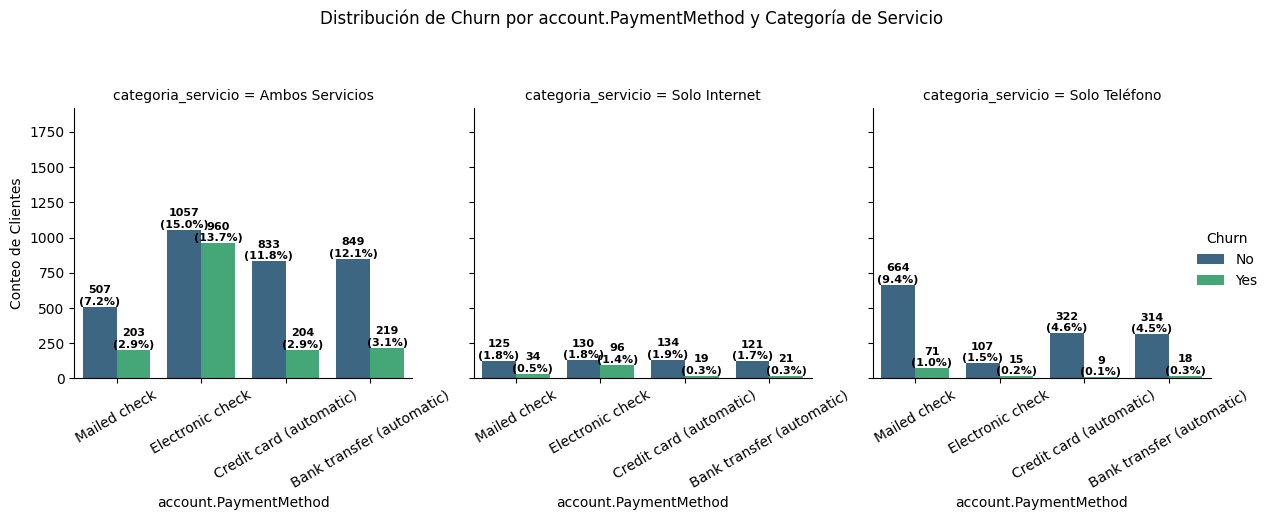

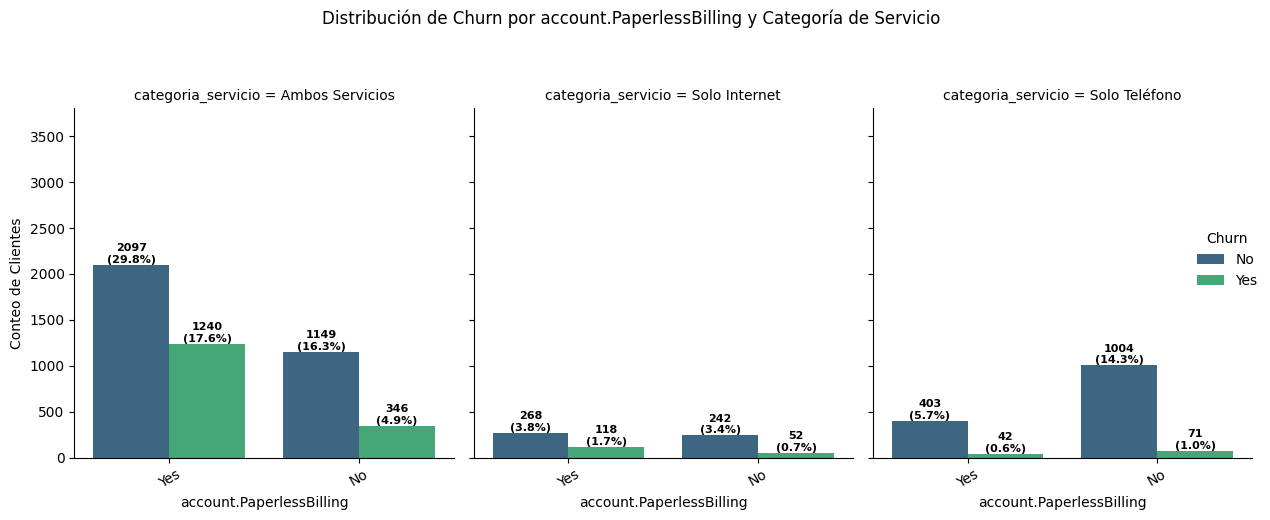

In [46]:
# Lista de columnas demográficas
categoria_comportamiento=['account.Contract',
    'account.PaymentMethod',
    'account.PaperlessBilling']


# Total de registros para calcular porcentajes (usando el df de ejemplo)
total_records = len(df_normalizedcopy)

# Iteramos sobre cada columna demográfica para crear un gráfico
for col in categoria_comportamiento:
    # Usamos catplot para crear subplots por 'categoria_servicio'
    g = sns.catplot(
        data= df_normalizedcopy,
        x=col,
        hue='Churn',
        col='categoria_servicio', # Esto crea los subplots
        kind='count',
        palette='viridis',
        height=5,
        aspect=0.8
    )

    # Título general para la figura
    g.fig.suptitle(f'Distribución de Churn por {col} y Categoría de Servicio', y=1.03)
    g.set_xticklabels(rotation=30)
    g.set_xlabels(f'{col}')
    g.set_ylabels('Conteo de Clientes')

    # ── Anotaciones de conteo y porcentaje ───────────────────────────
    # Iteramos sobre cada subplot (ax) en la figura
    for ax in g.axes.flat:
        # Iteramos sobre cada barra (patch) en el subplot
        for patch in ax.patches:
            count = int(patch.get_height())
            if count == 0:
                continue
            pct = 100 * count / total_records
            ax.annotate(
                f'{count}\n({pct:.1f}%)',
                (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                ha='center', va='bottom',
                fontsize=8, fontweight='bold'
            )
        # Ajustar límites del eje Y para dar espacio a las etiquetas
        if ax.get_ylim()[1] > 0: # Solo si hay datos
            y_max = ax.get_ylim()[1]
            ax.set_ylim(0, y_max * 1.20)

    plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajustar para el suptitle
    plt.show()

account.contract

para ambos servicios,el contracto mes a mes, es unos de los influyentes para seguir utlizando los servicios de la empresa.

account.PaymentMethod

para ambos serivicios, el metodo de pago electronico es influyente en no seguir con los servicios de la empresa

account.paperlessBilling

tener facturacion sin papel afecta a no seguir en la empresa (17.6), en comparacion no tener 4.9

**Grafico ternure**

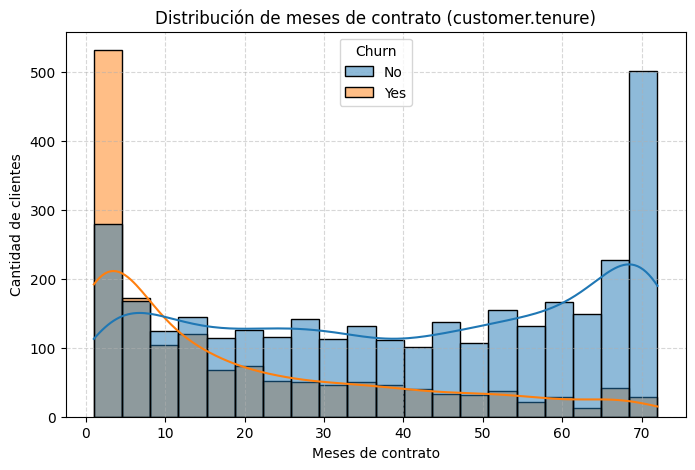

In [47]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_ambos_servicios, x='customer.tenure', hue='Churn', bins=20, kde=True)
plt.title('Distribución de meses de contrato (customer.tenure)')
plt.xlabel('Meses de contrato')
plt.ylabel('Cantidad de clientes')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Costumer.tenure

Para ambos servicios, menos meses de contracto eligen no seguir con los servicios de la empresa

Categoria economica

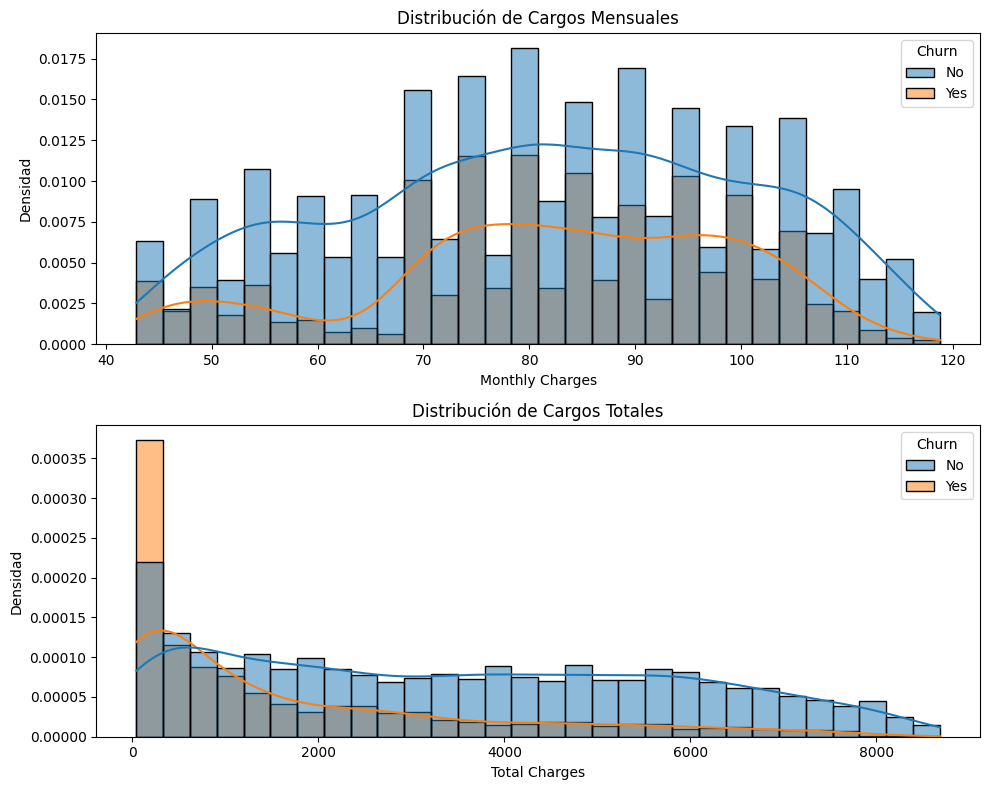

In [ ]:
# Crear figura con dos subplots (uno debajo del otro)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # 2 filas, 1 columna

# Gráfico para 'account.Charges.Monthly'
sns.histplot(data=df_ambos_servicios, x='account.Charges.Monthly', hue='Churn',
             kde=True,
             color='dodgerblue',
             bins=30,
             stat='density',
             ax=axes[0])
axes[0].set_title('Distribución de Cargos Mensuales')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Densidad')

# Gráfico para 'account.Charges.Total'
sns.histplot(data=df_ambos_servicios, x='account.Charges.Total', hue='Churn',
             kde=True,
             color='darkorange',
             bins=30,
             stat='density',
             ax=axes[1])
axes[1].set_title('Distribución de Cargos Totales')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Densidad')

# Ajustar espacio entre los gráficos
plt.tight_layout()
plt.show()

los cargos totales menores para ambos servicios, no sigue con los servicios

/tmp/ipython-input-1854484251.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


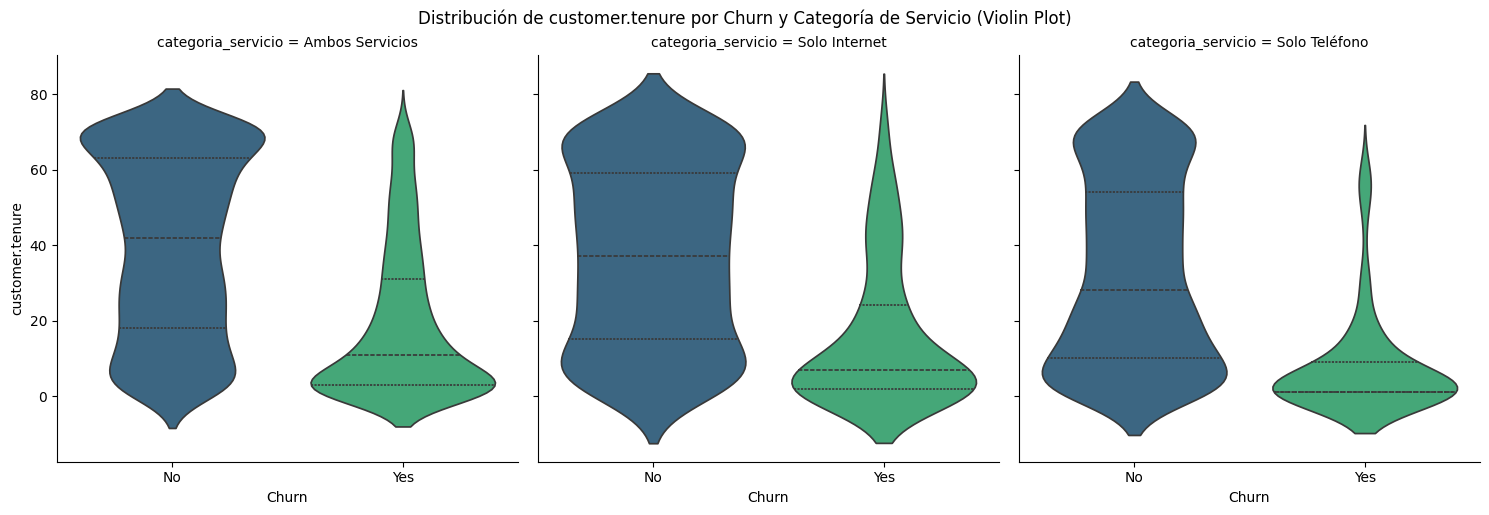

/tmp/ipython-input-1854484251.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


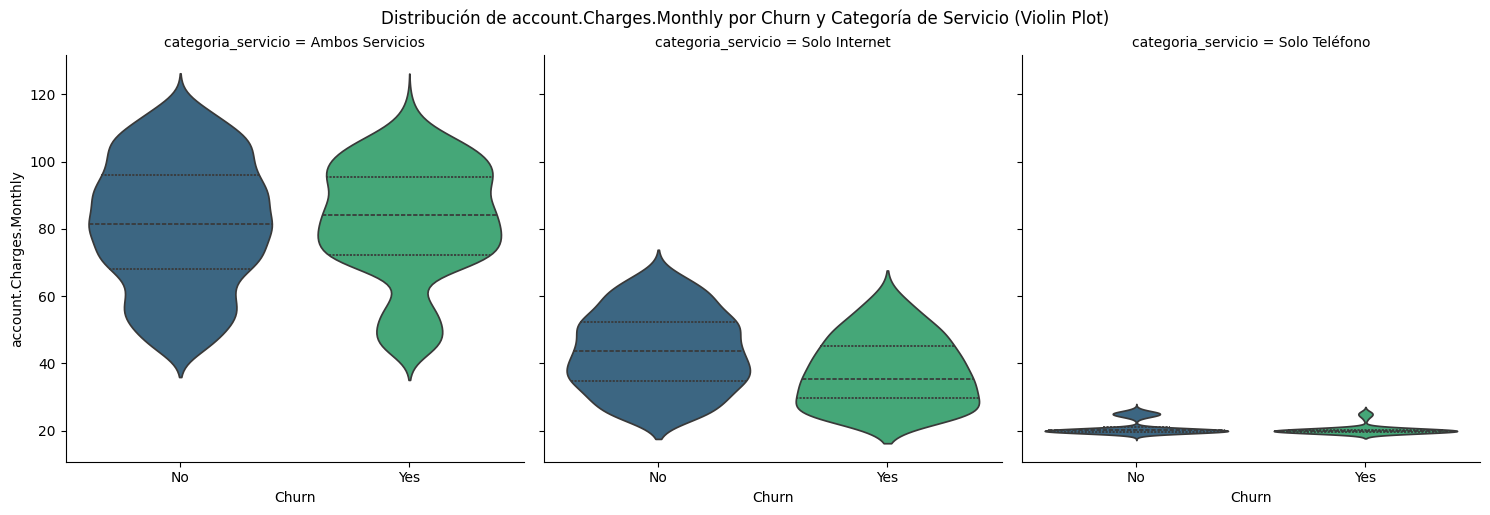

/tmp/ipython-input-1854484251.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


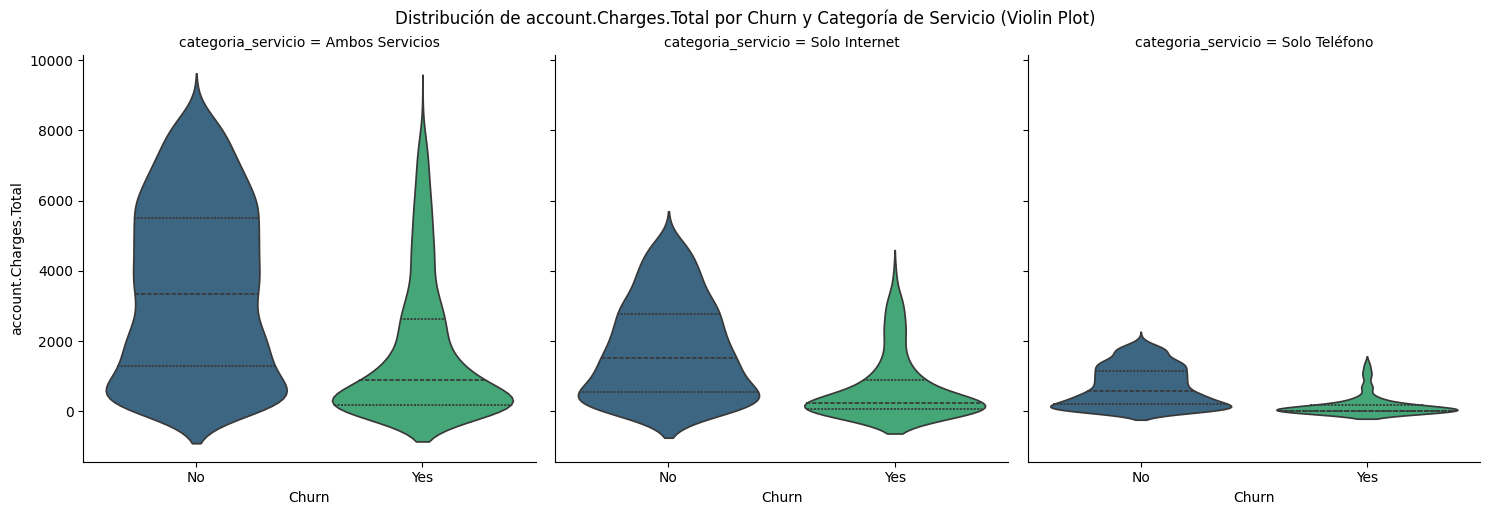

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io



columns_numeric = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

for col_num in columns_numeric:
    sns.catplot(
        data=df_normalizedcopy,
        x='Churn',
        y=col_num,
        col='categoria_servicio',
        kind='violin', # Aquí está el cambio a 'violin'
        palette='viridis',
        inner='quartile' # Muestra las líneas de los cuartiles dentro del violín
    )
    plt.suptitle(f'Distribución de {col_num} por Churn y Categoría de Servicio (Violin Plot)', y=1.02)
    plt.show()

los cargos totales menores para ambos servicios, no sigue con los servicios de la empresa

acount.charges.Monthly

solo telefono: menos cargos mensuales eligen dejar de usar  la empresa
solo internet: menos cargos mensuales eligen dejar la empresa

ambos servicio: si el cargo mensual es alto dejan de usar los servicios de la empresa

acouunt.charges.total

para todos los tipos de servicios la menor cantidad de charges total,influye en la eleccion de dejar la empresa

Grafica de datos demograficos segun churn con el datset de usarios que utlizan un solamente un servicio

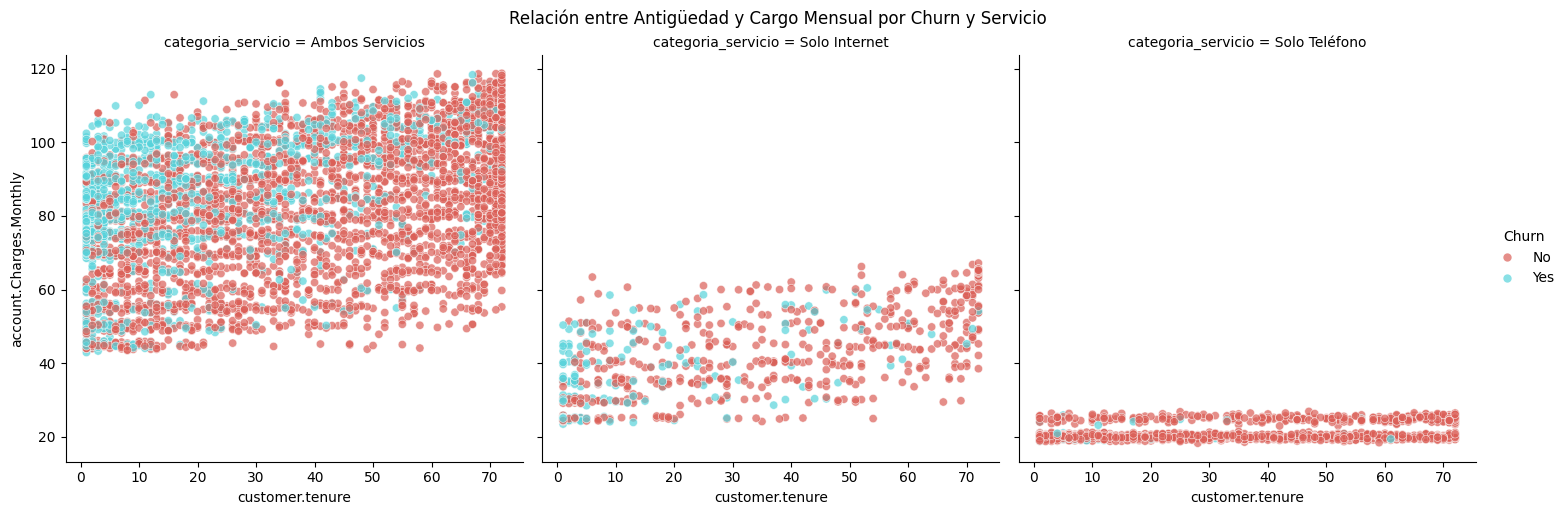

In [53]:
# Gráfico de dispersión
sns.relplot(
    data=df_normalizedcopy,
    x='customer.tenure',
    y='account.Charges.Monthly',
    hue='Churn',
    col='categoria_servicio',
    palette= 'hls',
    alpha=0.7 # Añadimos transparencia para ver mejor los puntos superpuestos
)
plt.suptitle('Relación entre Antigüedad y Cargo Mensual por Churn y Servicio', y=1.02)
plt.show()

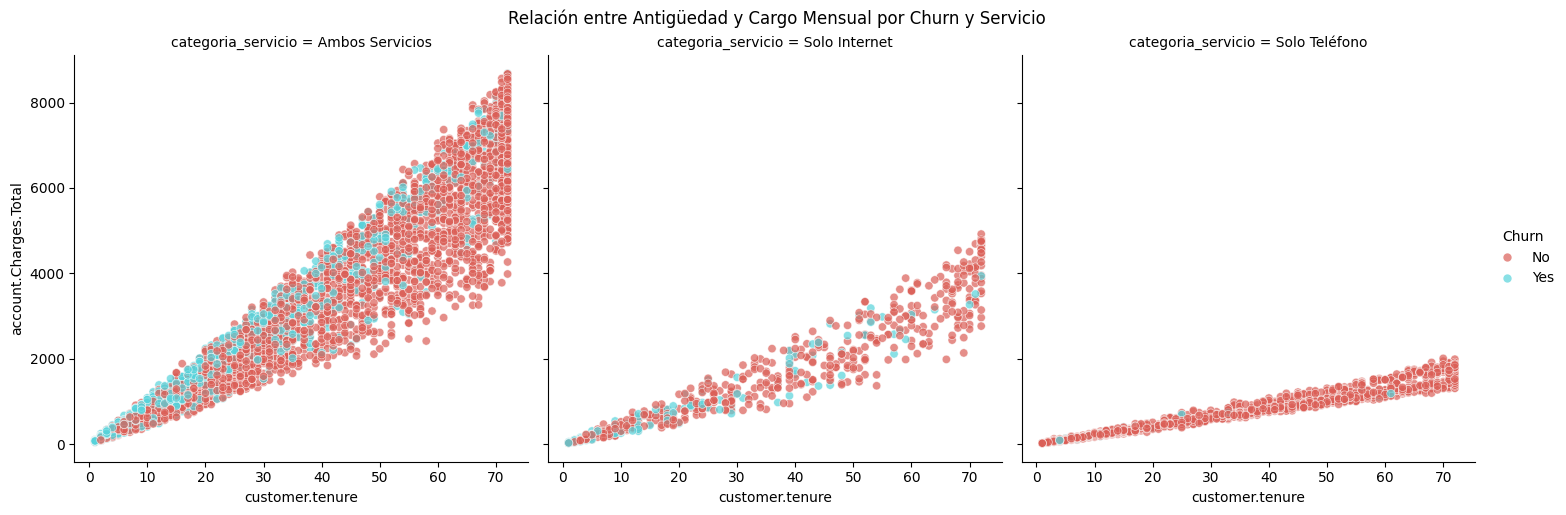

In [ ]:
# Gráfico de dispersión
sns.relplot(
    data=df_normalizedcopy,
    x='customer.tenure',
    y='account.Charges.Total',
    hue='Churn',
    col='categoria_servicio',
    palette= 'hls',
    alpha=0.7 # Añadimos transparencia para ver mejor los puntos superpuestos
)
plt.suptitle('Relación entre Antigüedad y Cargo Mensual por Churn y Servicio', y=1.02)
plt.show()

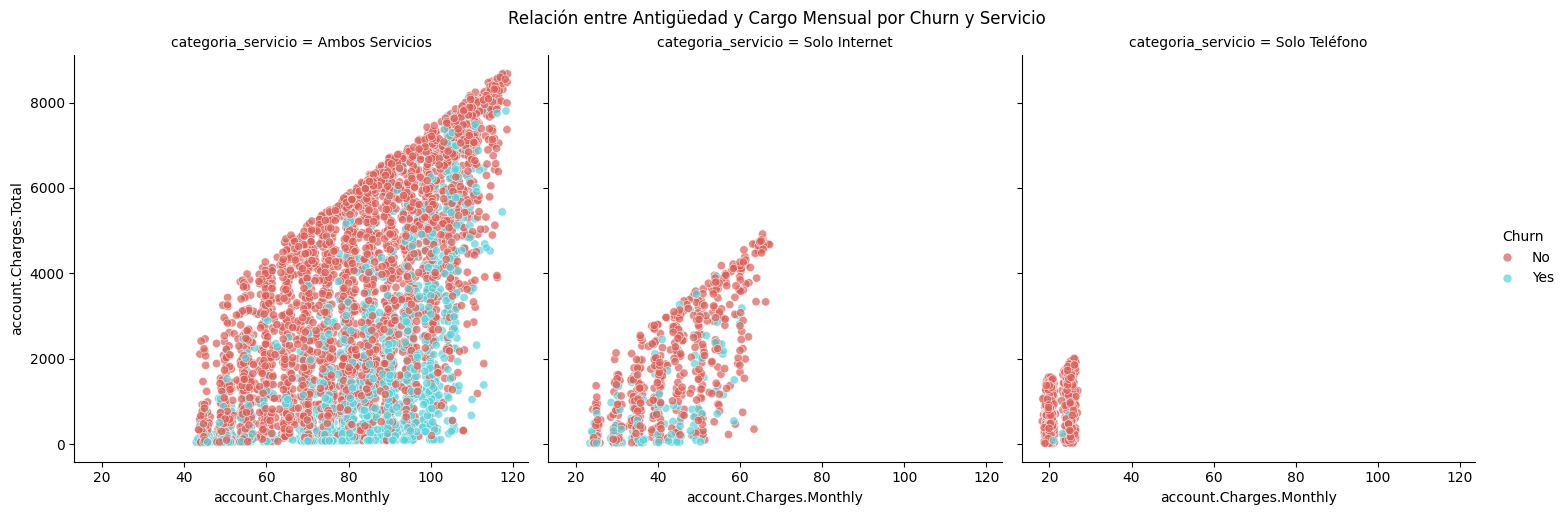

In [ ]:
# Gráfico de dispersión
sns.relplot(
    data=df_normalizedcopy,
    x='account.Charges.Monthly',
    y='account.Charges.Total',
    hue='Churn',
    col='categoria_servicio',
    palette= 'hls',
    alpha=0.7 # Añadimos transparencia para ver mejor los puntos superpuestos
)
plt.suptitle('Relación entre Antigüedad y Cargo Mensual por Churn y Servicio', y=1.02)
plt.show()

In [ ]:
df_normalizedcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   object 
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

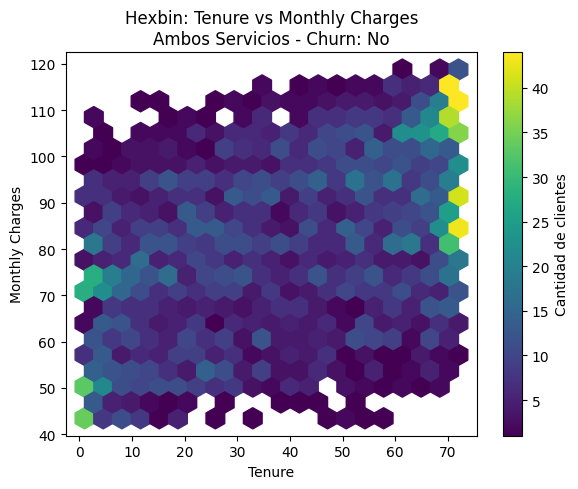

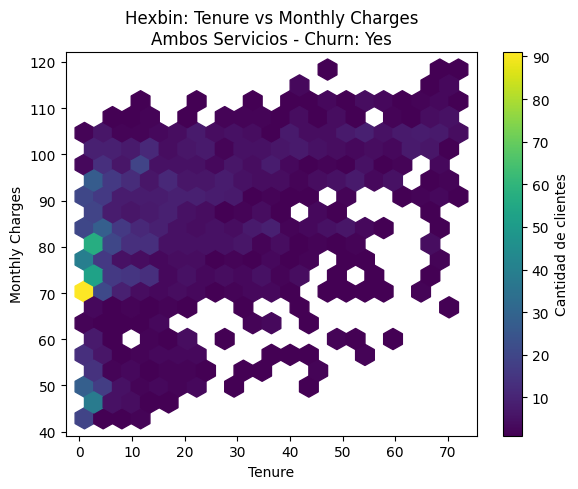

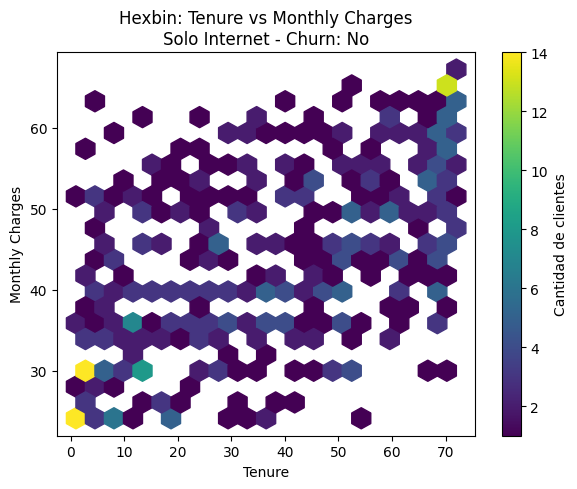

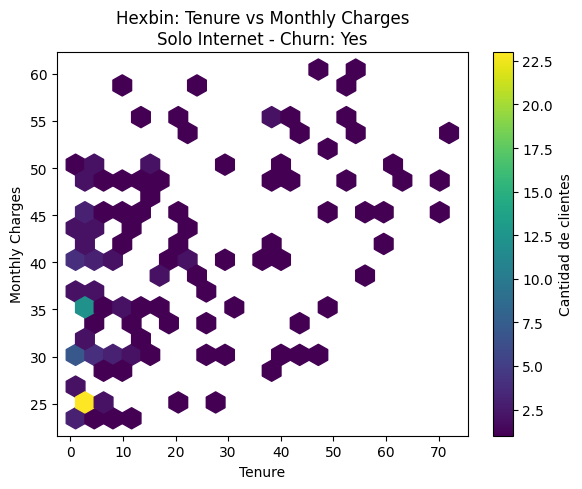

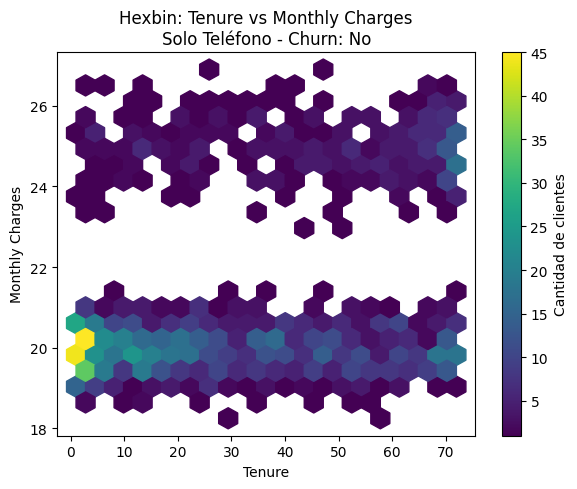

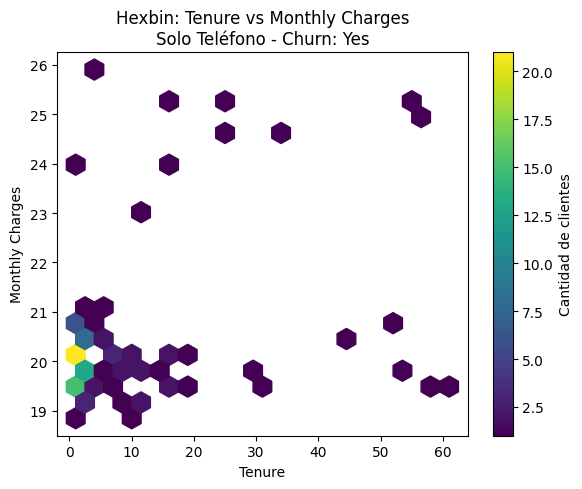

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

for servicio in df_normalizedcopy['categoria_servicio'].unique():
    for churn in df_normalizedcopy['Churn'].unique():
        subset = df_normalizedcopy[(df_normalizedcopy['categoria_servicio'] == servicio) & (df_normalizedcopy['Churn'] == churn)]
        if len(subset) > 0:
            plt.figure(figsize=(6, 5))
            plt.hexbin(
                subset['customer.tenure'],
                subset['account.Charges.Monthly'],
                gridsize=20, cmap='viridis', mincnt=1
            )
            plt.colorbar(label='Cantidad de clientes')
            plt.title(f'Hexbin: Tenure vs Monthly Charges\n{servicio} - Churn: {churn}')
            plt.xlabel('Tenure')
            plt.ylabel('Monthly Charges')
            plt.tight_layout()
            plt.show()

In [63]:
df_normalizedcopy.head()
df_normalizedcopy.sample(10)

customerID Churn customer.gender customer.SeniorCitizen  \
74    0118-JPNOY    No          Female                    Yes   
4850  6635-CPNUN    No            Male                     No   
6415  8808-ELEHO   Yes            Male                    Yes   
712   1023-BQXZE    No            Male                     No   
1901  2688-BHGOG    No            Male                    Yes   
4854  6645-MXQJT    No            Male                     No   
966   1356-MKYSK    No            Male                     No   
4901  6701-DHKWQ    No          Female                     No   
5035  6890-PFRQX    No            Male                     No   
1997  2826-DXLQO    No            Male                    Yes   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
74                 No                  No               26                Yes   
4850              Yes                  No               28                Yes   
6415               No                  No                8                Yes   
712                No                  No               57                Yes   
1901               No                  No                9                Yes   
4854              Yes                 Yes                2                Yes   
966                No                  No                6                Yes   
4901              Yes                 Yes               61                 No   
5035               No                  No               18                Yes   
1997              Yes                  No                7                 No   

     phone.MultipleLines internet.InternetService  ... internet.StreamingTV  \
74                    No              Fiber optic  ...                  Yes   
4850                 Yes              Fiber optic  ...                  Yes   
6415                 Yes              Fiber optic  ...                   No   
712                   No                      DSL  ...                  Yes   
1901                  No              Fiber optic  ...                   No   
4854                  No              Fiber optic  ...                  Yes   
966                   No                      DSL  ...                  Yes   
4901    No phone service                      DSL  ...                  Yes   
5035                 Yes                      DSL  ...                  Yes   
1997    No phone service                      DSL  ...                   No   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
74                         No   Month-to-month                      Yes   
4850                       No   Month-to-month                       No   
6415                       No   Month-to-month                      Yes   
712                       Yes         Two year                      Yes   
1901                      Yes   Month-to-month                      Yes   
4854                      Yes   Month-to-month                       No   
966                       Yes   Month-to-month                       No   
4901                       No         Two year                       No   
5035                       No   Month-to-month                       No   
1997                       No   Month-to-month                       No   

          account.PaymentMethod account.Charges.Monthly account.Charges.Total  \
74      Credit card (automatic)                   85.80               2193.65   
4850    Credit card (automatic)                   96.60               2684.35   
6415           Electronic check                   81.25                585.95   
712   Bank transfer (automatic)                   74.35               4317.35   
1901           Electronic check                   79.55                718.55   
4854           Electronic check                   97.10                184.15   
966     Credit card (automatic)                   78.65                483.30   
4901    Credit card (automatic)                   51.3

# Conclusiones

usarios que tiene ambos servicios de telefonia y internet, presentan la mayor cantidad de personas que desertan de los servicios de la emprese telecom

la ausencia de servicios que ofrece el servicio de internet tambien es un efecto para dejar de usar los servicios de la empresa